# Klasifikasi Kesehatan Janin

## Pendahuluan
Beberapa kehamilan dapat rumit oleh kondisi medis pada ibu (misalnya, diabetes atau tekanan darah tinggi) atau kondisi yang dapat mempengaruhi kesehatan atau perkembangan bayi. Prevalensi kehamilan berisiko tinggi lebih tinggi di daerah dengan sumber daya yang lebih rendah - di India, misalnya, sekitar 20%–30% kehamilan termasuk dalam kategori berisiko tinggi, yang bertanggung jawab atas 75% morbiditas dan mortalitas perinatal.

Jika bayi dengan kemungkinan masalah dapat diidentifikasi, dan jika ada intervensi yang efektif untuk meningkatkan hasil, maka tes yang akurat yang dapat digunakan selama kehamilan dapat bermanfaat. **Cardiotocography (CTG)** adalah catatan elektronik kontinu dari detak jantung bayi yang diperoleh melalui transduser ultrasonografi yang ditempatkan di perut ibu.

Pemantauan CTG secara luas digunakan untuk menilai kesejahteraan janin dengan mengidentifikasi bayi yang berisiko mengalami hipoksia (kekurangan oksigen), dan biasanya digunakan selama persalinan. Tinjauan menemukan bahwa pada periode antenatal (sebelum persalinan), tidak ada bukti yang menunjukkan bahwa pemantauan wanita dengan kehamilan berisiko tinggi bermanfaat bagi ibu atau bayi, meskipun penelitian tambahan diperlukan untuk memberikan informasi lebih lanjut seputar praktik ini. Selain itu, pemantauan CTG kadang-kadang dapat menyebabkan intervensi medis yang tidak selalu diperlukan.

Mengingat pentingnya dan kebutuhan akan metode yang efektif dan dapat diandalkan untuk menilai kesehatan janin dan ibu, penting untuk memeriksa data CTG, karena data ini secara luas digunakan dan relatif terjangkau.

## Data
Dataset yang digunakan dalam notebook ini berisi 2126 rekaman fitur yang diekstraksi dari pemeriksaan CTG, yang kemudian diklasifikasikan oleh tiga dokter kandungan ahli menjadi 3 kelas:
- Normal
- Suspect (Mencurigakan)
- Pathological (Patologis)

Berdasarkan pedoman FIGO (Federasi Internasional Obstetri dan Ginekologi) terbaru, kelas-kelas ini harus diinterpretasikan sebagai berikut:
- **Normal**: Tidak ada hipoksia atau asidosis; tidak diperlukan intervensi untuk meningkatkan keadaan oksigenasi janin.
    - Denyut jantung janin dalam kisaran 110–160 bpm, dengan variasi 5–25 bpm.
    - Tidak ada deceleration berulang.
- **Suspect (Mencurigakan)**: Kemungkinan rendah hipoksia/asidosis, memerlukan tindakan untuk memperbaiki penyebab yang dapat dibalikkan jika teridentifikasi, pemantauan ketat atau metode tambahan.
    - Tidak memiliki setidaknya satu karakteristik kewajaran,

 tetapi tanpa fitur patologis.
- **Pathological (Patologis)**: Kemungkinan tinggi hipoksia/asidosis, memerlukan tindakan segera untuk memperbaiki penyebab yang dapat dibalikkan, metode tambahan, atau jika tidak memungkinkan, percepat persalinan. Dalam situasi akut, persalinan harus segera dilakukan.
    - Denyut jantung janin baseline <100 bpm.
    - Variabilitas yang berkurang atau meningkat atau pola sinusoidal.
    - Deceleration berulang terlambat atau yang berkepanjangan selama >30 menit, atau >20 menit jika variabilitas berkurang.
    - Deceleration >5 menit.

Data ini mengandung 21 variabel, semuanya berupa angka.



# Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd

import os
import re
import random
from joblib import dump, load

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D, offset_copy
import seaborn as sns

import math
import scipy.stats as ss
from collections import Counter

In [2]:
df = pd.read_csv("fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Constants

In [4]:
SEED = 42

target = "fetal_health"

COLORS = {
    "fig_bg": "#f6f5f5",
    "plot_neut": "#ddbea9",
    "plot_text": "#343a40",
    "class": {
        0: "#4361EE",
        1: "#7209b7",
        2: "#f72585"
    },
    "class_light": {
        0: "#CAD3FA",
        1: "#DAA9FB",
        2: "#FDD1E5"
    },
    
    "cmap_color_list" : [
        "#7400B8",
        "#6930C3",
        "#5E60CE",
        "#5390D9",
        "#4EA8DE",
        "#48BFE3",
        "#56CFE1",
        "#64DFDF",
        "#72EFDD",
        "#80FFDB",
        "#E4FFF7"
    ]
}

colors_class_list = list(COLORS["class"].values())

FONT_KW = {
    "plot_title" : {
        "fontname": "Consolas",
        "weight": "bold",
        "size": "25",
        "style": "normal"
    },
    "plot_subtitle" : {
        "fontname": "Consolas",
        "weight": "bold",
        "size": "12",
        "style": "normal"
    },
    "subplot_title" : {
        "fontname": "Consolas",
        "weight": "bold",
        "size": "18",
        "style": "normal"
    },
    "subplot_title_small" : {
        "fontname": "Consolas",
        "weight": "bold",
        "size": "12",
        "style": "normal"
    },
    "plot_label" : {
        "fontname": "Consolas",
        "weight": "bold",
        "size": "16",
        "style": "normal"
    },
    "plot_label_small" : {
        "fontname": "Consolas",
        "weight": "bold",
        "size": "12",
        "style": "normal"
    },
    "plot_text" : {
        "fontname": "Consolas",
        "weight": "normal",
        "size": "12",
        "style": "normal"
    },
    "plot_text_small" : {
        "fontname": "Consolas",
        "weight": "normal",
        "size": "10",
        "style": "normal"
    },
}

class_dict = {0: "Normal", 1: "Suspect", 2: "Pathological"}

# Pembagian Data
Kami akan membagi data menjadi set pelatihan dan pengujian, untuk mengesampingkan sebagian sampel sebelum melakukan eksplorasi data, dalam upaya untuk meminimalkan bias. Namun, bahkan sebelum menjelajahi dataset, kita dapat berasumsi bahwa ada ketidakseimbangan kelas, seperti biasanya terjadi saat bekerja dengan data terkait kesehatan. Oleh karena itu, kita akan memastikan untuk mempertahankan distribusi kelas yang serupa saat membagi dataset.

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=target).copy()
y = df[target].copy()

y -= 1 # originally, the targets are 1-3; we will use 0-2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

# Exploratory Data Analysis

## Helper Functions

In [6]:
def count_values_relative(y):
    bins, vals = np.unique(y, return_counts=True)
    return bins, 100 * vals / np.sum(vals)

def ceil_d(n, d=1000):
    return int(np.ceil(n / d) * d)

def get_subplot_dims(N):
    r = np.ceil(np.sqrt(N))
    c = np.floor(np.sqrt(N))
    if r*c < N:
        r += 1
    return int(r), int(c)

def rainbow_text(x, y, strings, colors, orientation="horizontal",
                 ax=None, **kwargs):
    """
      Mengambil daftar *string* dan *warna* dan menempatkannya bersebelahan, dengan teks strings[i] ditampilkan dalam warna colors[i].

      Parameter
      ----------
      x, y : float
          Posisi teks dalam koordinat data.
      strings : list dari str
          String yang akan digambar.
      colors : list dari color
          Warna yang akan digunakan.
      orientation : {"horizontal", "vertical"}
      ax : Axes, opsional
          Axes tempat menggambar. Jika None, axes saat ini akan digunakan.
      **kwargs
          Semua argumen kata kunci lainnya akan diteruskan ke plt.text(), sehingga Anda dapat
          mengatur ukuran font, keluarga, dll.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    fig = plt.gcf()
    canvas = fig.canvas

    assert orientation in ["horizontal", "vertical"]
    if orientation == "vertical":
        kwargs.update(rotation=90, verticalalignment="bottom")

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        # Convert window extent from pixels to inches
        # to avoid issues displaying at different dpi
        ex = fig.dpi_scale_trans.inverted().transform_bbox(ex)

        if orientation == "horizontal":
            t = text.get_transform() + \
                offset_copy(Affine2D(), fig=fig, x=ex.width, y=0)
        else:
            t = text.get_transform() + \
                offset_copy(Affine2D(), fig=fig, x=0, y=ex.height)
            
def rainbow_text_class(txt, x=0, y=0, ax=None, **font_kw):
    words = txt.split()
    colors = ["black"] * len(words)
    for c in class_dict:
        if class_dict[c] in words:
            colors[words.index(class_dict[c])] = COLORS["class"][c]
    rainbow_text(x, y, words, colors, ax=ax, **FONT_KW["plot_text"])
    
def get_colorbars(fig):
    cbs = []
    for ax in fig.axes:
        cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))
    return [a.colorbar for a in cbs]
    
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
    
def correlation_ratio(categories, measurements):
    if isinstance(categories, pd.Series):
        categories = categories.values
    if isinstance(measurements, pd.Series):
        measurements = measurements.values
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

Code di atas adalah kumpulan fungsi-fungsi yang digunakan untuk melakukan berbagai operasi terkait analisis data dan visualisasi.

In [7]:
df_eda = X_train.copy()
df_eda[target] = y_train.copy()

In [8]:
df_eda.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [9]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,1700.0,133.086471,9.780832,106.0,126.000,133.000,140.000,160.000
accelerations,1700.0,0.003196,0.003851,0.0,0.000,0.002,0.006,0.018
fetal_movement,1700.0,0.009935,0.047982,0.0,0.000,0.000,0.003,0.477
uterine_contractions,1700.0,0.004362,0.002925,0.0,0.002,0.005,0.007,0.014
light_decelerations,1700.0,0.001855,0.002917,0.0,0.000,0.000,0.003,0.015
severe_decelerations,1700.0,0.000003,0.000054,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,1700.0,0.000162,0.000595,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,1700.0,46.722353,17.316446,12.0,32.000,48.000,61.000,86.000
mean_value_of_short_term_variability,1700.0,1.335059,0.873099,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,1700.0,9.953529,18.492499,0.0,0.000,0.000,11.000,91.000


In [10]:
df_eda.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1953,133.0,0.000,0.000,0.012,0.001,0.0,0.002,60.0,3.0,0.0,...,58.0,155.0,4.0,0.0,125.0,96.0,105.0,79.0,0.0,2.0
1439,146.0,0.006,0.000,0.003,0.000,0.0,0.000,38.0,1.0,0.0,...,126.0,175.0,3.0,0.0,150.0,152.0,153.0,5.0,0.0,0.0
2033,129.0,0.000,0.001,0.007,0.006,0.0,0.002,67.0,3.2,0.0,...,66.0,146.0,7.0,0.0,105.0,80.0,107.0,9.0,0.0,2.0
1731,134.0,0.008,0.001,0.010,0.006,0.0,0.000,61.0,1.1,0.0,...,80.0,189.0,10.0,0.0,156.0,144.0,151.0,61.0,0.0,0.0
241,125.0,0.000,0.005,0.001,0.001,0.0,0.000,70.0,0.4,29.0,...,52.0,133.0,5.0,0.0,125.0,123.0,125.0,2.0,1.0,1.0


In [11]:
df_eda.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Kita dapat melihat bahwa semua variabel adalah numerik, dengan rentang nilai yang berbeda, dan tidak ada nilai yang hilang.

TypeError: set_ticks() got an unexpected keyword argument 'fontname'

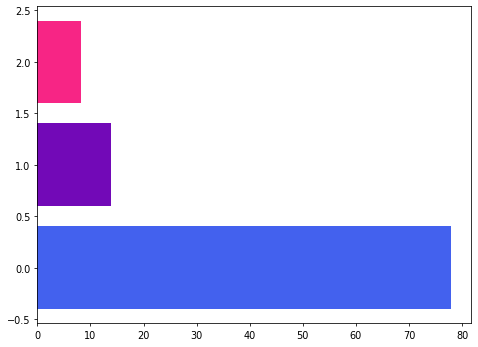

In [12]:
bins, vals = count_values_relative(df_eda[target])

fig, ax = plt.subplots(figsize=(8, 6), dpi=70)

b = ax.barh(bins, vals, color=colors_class_list)

ax.set_yticks(bins, class_dict.values(), **FONT_KW["plot_label"], color=COLORS["plot_text"])
ax.tick_params(axis="y", length=0)

plt.figtext(0, 1.0, "Class Distribution", **FONT_KW["plot_title"], color=COLORS["plot_text"])

txt = f"The data is highly imbalanced, with {int(np.round(vals[bins==0][0]))}% of samples in the {class_dict[0]} class"
rainbow_text_class(txt, x=-13, y=2.8, ax=ax, **FONT_KW["plot_text"])

txt = f"and only {int(np.round(vals[bins==2][0]))}% of samples in the {class_dict[2]} class."
rainbow_text_class(txt, x=-13, y=2.6, ax=ax, **FONT_KW["plot_text"])

for i, val in zip(bins, vals):
    ax.text(
        val, i,
        str(int(np.round(val))) + "%",
        ha="right",
        color=COLORS["class_light"][i],
        **FONT_KW["plot_label"]
    )

fig.patch.set_facecolor(COLORS["fig_bg"])
ax.set_facecolor(COLORS["fig_bg"])
for i, c in enumerate(colors_class_list):
    ax.get_yticklabels()[i].set_color(c)

ax.axes.get_xaxis().set_visible(False)

for spine in ["bottom", "right", "top"]:
    ax.spines[spine].set_visible(False)

plt.show()

In [13]:
def str_new_line(s, max_len=30, delimiter=None):
    if not isinstance(s, str) and isinstance(s, list):
        s = "".join(s)
    if delimiter is not None:
        s = s.replace(delimiter," ")
    s_new = list(s)
    if len(s) > max_len:
        s_left = s[:max_len]
        ind_space = s_left.rfind(" ")
        s_new[ind_space] = "\n"
    return "".join(s_new)

C:\Users\USER\AppData\Local\Temp/ipykernel_8820/1919237668.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\USER\AppData\Local\Temp/ipykernel_8820/1919237668.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\USER\AppData\Local\Temp/ipykernel_8820/1919237668.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\USER\AppData\Local\Temp/ipykernel_8820/1919237668.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\USER\AppData\Local\Temp/ipykernel_8820/1919

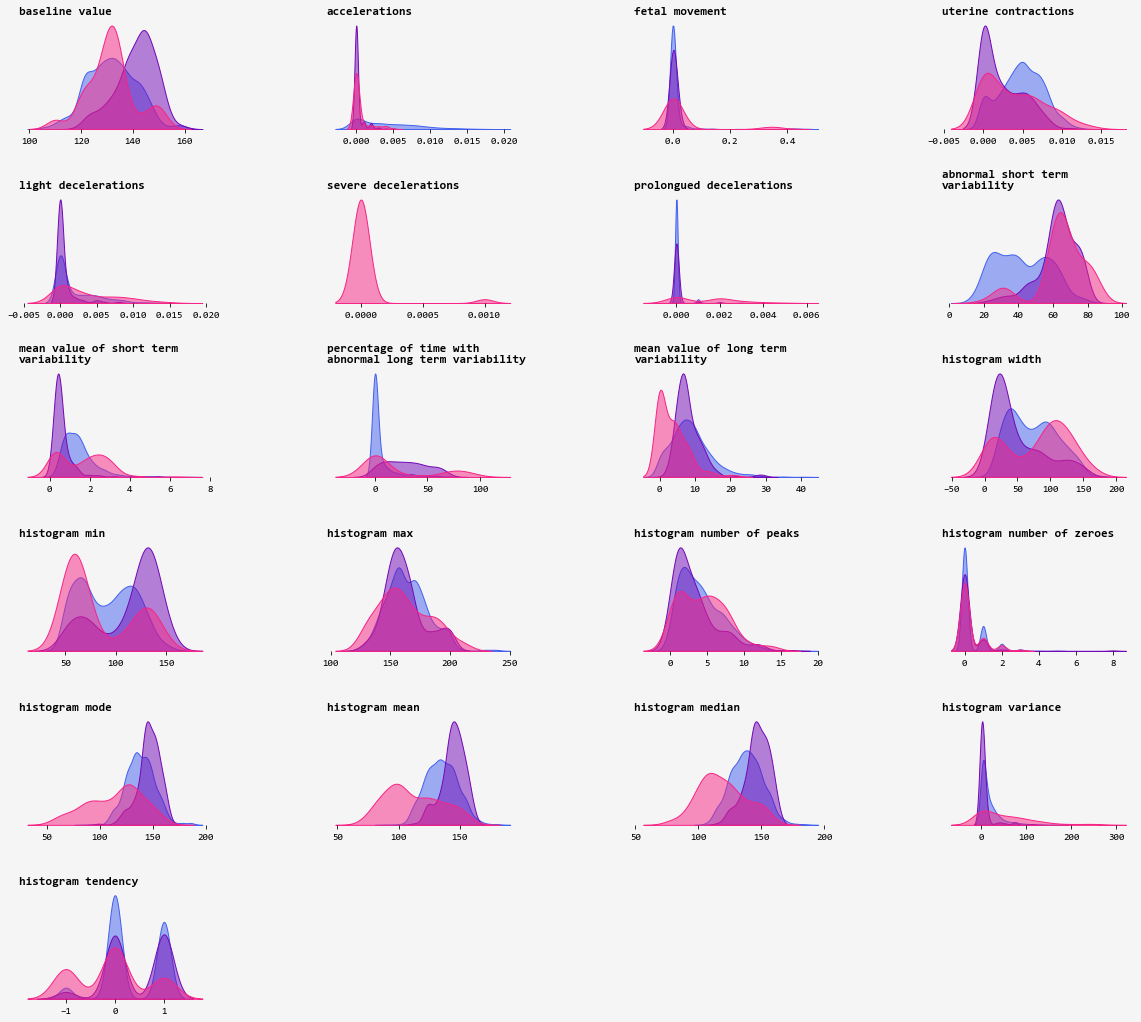

In [14]:
FEATURES = df_eda.drop(columns=target).columns.tolist()

nrows, ncols = get_subplot_dims(len(FEATURES))

fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.patch.set_facecolor(COLORS["fig_bg"])

for i, f in enumerate(FEATURES):
    ax = plt.subplot(nrows, ncols, i+1)
    
    for c in class_dict.keys():
        sns.kdeplot(
            data=df_eda[df_eda[target]==c],
            x=f,
            ax=ax,
            shade=True, 
            alpha=0.5,
            color=COLORS["class"][c],
            warn_singular=False
        )
    
    ax.set_title(
        str_new_line(f, max_len=30, delimiter="_"),
        **FONT_KW["subplot_title_small"],
        loc="left",
        ha="left",
        va="baseline"
    )
    
    ax.set_facecolor(COLORS["fig_bg"])
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlabel("")
    
    plt.xticks(**FONT_KW["plot_text_small"])
    
    for spine in ["bottom", "left", "right", "top"]:
        ax.spines[spine].set_visible(False)
    
plt.show()

kode tersebut menghasilkan tampilan subplot dengan KDE plot untuk setiap fitur, membaginya berdasarkan kelas target, dan mengatur penampilan visualisasi dengan menggunakan warna, judul subplot, dan gaya teks yang telah ditentukan sebelumnya.

TypeError: set_ticks() got an unexpected keyword argument 'fontname'

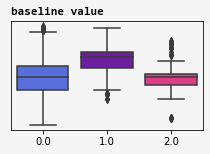

In [15]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.patch.set_facecolor(COLORS["fig_bg"])

for i, f in enumerate(FEATURES):
    ax = plt.subplot(nrows, ncols, i+1)
    
    sns.boxplot(y=df_eda[f],x=df_eda[target], palette=colors_class_list, ax=ax)
        
    ax.set_title(
        str_new_line(f, max_len=30, delimiter="_"),
        **FONT_KW["subplot_title_small"],
        loc="left",
        ha="left",
        va="baseline"
    )
    
    ax.set_facecolor(COLORS["fig_bg"])
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlabel("")
    ax.set_xticks(ax.get_xticks(), class_dict.values(), **FONT_KW["plot_text_small"])
    ax.tick_params(axis="x", length=0)
    for spine in ["bottom", "left", "right", "top"]:
        ax.spines[spine].set_visible(False)
    
plt.show()

kode tersebut menghasilkan tampilan subplot dengan diagram kotak (box plot) untuk setiap fitur, membaginya berdasarkan kelas target, dan mengatur penampilan visualisasi dengan menggunakan warna, judul subplot, dan gaya teks yang telah ditentukan sebelumnya.

## Feature Correlations

TypeError: set_ticks() got an unexpected keyword argument 'fontname'

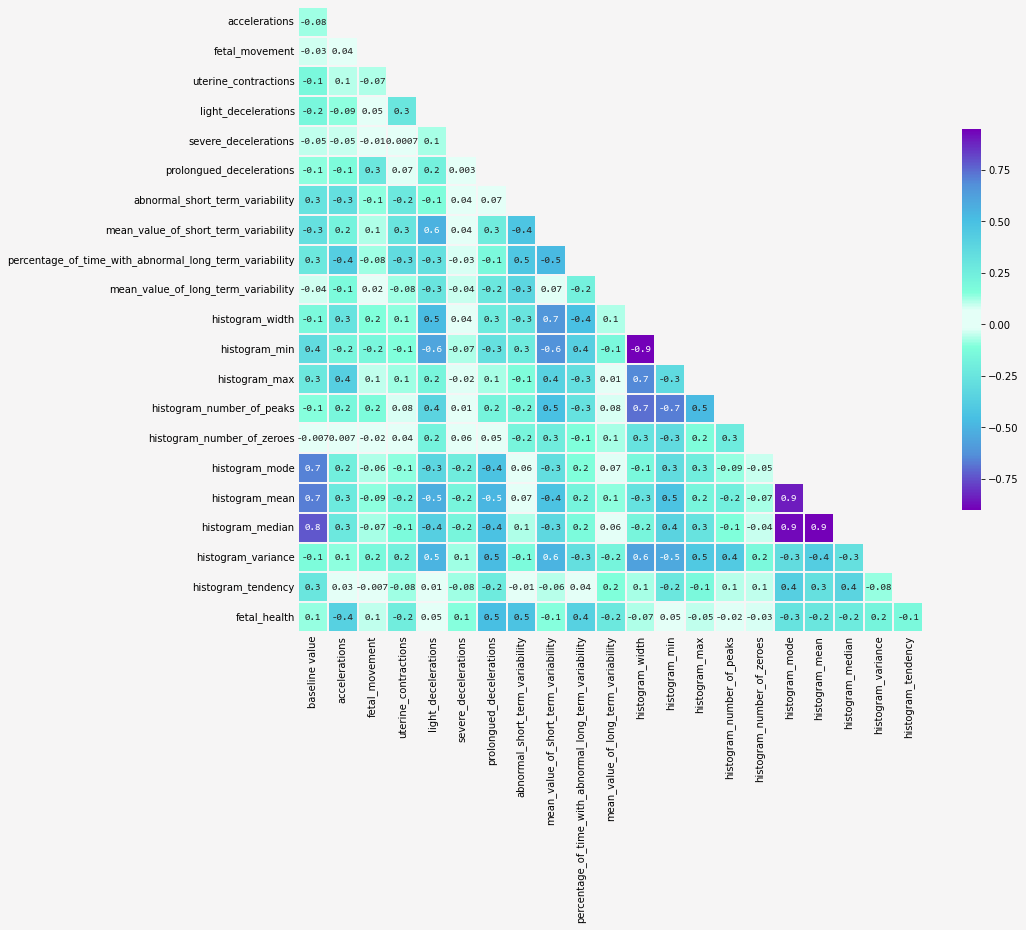

In [16]:
df_corr = df_eda.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))

colormap = mpl.colors.LinearSegmentedColormap.from_list(
    "", COLORS["cmap_color_list"] + COLORS["cmap_color_list"][::-1]
)

fig, ax = plt.subplots(figsize=(14,14))
fig.patch.set_facecolor(COLORS["fig_bg"])

sns.heatmap(
    df_corr.iloc[1:,:-1],
    ax=ax,
    mask=mask[1:,:-1],
    annot=True,
    annot_kws=FONT_KW["plot_text_small"],
    fmt=".1g",
    linewidths=2.0,
    linecolor=COLORS["fig_bg"],
    square=True,
    cbar=True,
    cbar_kws={"shrink": 0.5},
    cmap=colormap
)

ax.set_facecolor(COLORS["fig_bg"])
ax.tick_params(axis="both", length=0)
ax.set_yticks(
    np.arange(len(ax.get_yticklabels()))+0.5,
    [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax.get_yticklabels()],
    **FONT_KW["plot_text_small"],
)
ax.set_xticks(
    np.arange(len(ax.get_xticklabels()))+0.5,
    [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax.get_xticklabels()],
    **FONT_KW["plot_text_small"],
)

ax.set_title("Features Correlation", **FONT_KW["plot_title"], loc="left", pad=50)

plt.show()


Variabel target bersifat kategorikal, oleh karena itu, korelasi numerikal sederhana tidak dapat secara dapat diandalkan menggambarkan hubungannya dengan fitur numerikal kontinu. Namun, kita dapat menggunakan Rasio Korelasi (Correlation Ratio), yang didefinisikan sebagai varian terbobot dari rata-rata setiap kategori dibagi dengan varian dari seluruh sampel. Sebagai alternatif, rasio korelasi dapat dianggap sebagai seberapa besar kepastian yang diberikan oleh suatu angka kontinu terkait dengan sekumpulan kategori.

In [17]:
corr_ratio = pd.DataFrame(index=[target], columns=FEATURES)

for f in FEATURES:
    corr_ratio.loc[:,f] = correlation_ratio(df_eda[target], df_eda[f])

C:\Users\USER\AppData\Local\Temp/ipykernel_8820/1423238249.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  corr_ratio.loc[:,f] = correlation_ratio(df_eda[target], df_eda[f])


TypeError: set_ticks() got an unexpected keyword argument 'fontname'

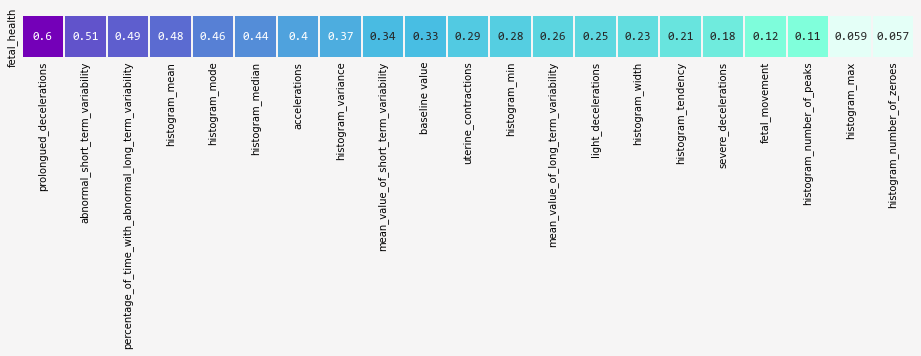

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor(COLORS["fig_bg"])

sns.heatmap(
    corr_ratio.T.sort_values(by=target, ascending=False).T,
    ax=ax,
    annot=True,
    annot_kws=FONT_KW["plot_text"],
    fmt=".2g",
    linewidths=2.0,
    linecolor=COLORS["fig_bg"],
    square=True,
    cbar=False,
    cmap=mpl.colors.LinearSegmentedColormap.from_list("", COLORS["cmap_color_list"][::-1])
)

ax.set_facecolor(COLORS["fig_bg"])
ax.tick_params(axis="both", length=0)

ax.set_xticks(
    np.arange(len(ax.get_xticklabels()))+0.5,
    [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax.get_xticklabels()],
    **FONT_KW["plot_text"],
)

ax.axes.get_yaxis().set_visible(False)

ax.set_title(
    f"Features Correlation Ratio to {target}".title().replace("_", " "),
    **FONT_KW["plot_title"],
    loc="left",
    pad=20
)

plt.show()

<b><i>Prolonged deccelerations</i></b> mengandung informasi paling signifikan mengenai variabel target, karena hanya terdapat nilai pada kelas <font color="#f72585"><b><i>Pathological</i></b></font>. Dengan kata lain, jika terdapat nilai pada fitur ini, kita dapat dengan pasti mengidentifikasi bahwa sampel tersebut termasuk dalam kelas <font color="#f72585"><b><i>Pathological</i></b></font>, namun jika nilai fitur ini adalah 0, kita tidak dapat membedakan antara kelas <font color="#4361EE"><b><i>Normal</i></b></font> dan <font color="#7209b7"><b><i>Suspect</i></b></font>.

Fitur <b><i>Abnormal short term variability</i></b> dan <b><i>percentage of time with abnormal long term variability</i></b> juga memberikan kontribusi yang signifikan terhadap kelas. Ketika melihat boxplot-nya di atas, terlihat bahwa kedua fitur ini dapat membedakan antara kelas <font color="#4361EE"><b><i>Normal</i></b></font> dan kelas lainnya; namun, fitur kedua memiliki banyak pencilan (outlier).

Fitur histogram yang menggambarkan pusat distribusi, yaitu <b><i>histogram mean</i></b>, <b><i>histogram mode</i></b>, dan <b><i>histogram median</i></b>, saling berkorelasi satu sama lain, dan memberikan informasi terkait variabel target, terutama dalam mengidentifikasi kelas <font color="#f72585"><b><i>Pathological</i></b></font>.








# Data Perparation

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train = X_train.copy()
df_test = X_test.copy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dengan melakukan penskalaan menggunakan StandardScaler, setiap fitur dalam data latihan dan data uji diubah sehingga memiliki rata-rata nol dan variansi satu. Hal ini dapat membantu dalam pemrosesan data dan pemodelan statistik karena menghilangkan perbedaan skala yang mungkin ada antara fitur-fitur tersebut.






# Cross Validation Scheme

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)

n_splits=5: Menentukan jumlah lipatan (fold) yang akan digunakan dalam validasi silang. Dalam hal ini, terdapat 5 lipatan.
n_repeats=10: Menentukan berapa kali validasi silang akan diulang. Dalam hal ini, validasi silang akan diulang sebanyak 10 kali.
random_state=SEED: Menentukan nilai acak yang digunakan untuk mengacak pemilihan sampel dalam validasi silang. Mengatur nilai random_state memastikan bahwa validasi silang dapat direproduksi dengan hasil yang sama setiap kali dijalankan.
Dengan menggunakan RepeatedStratifiedKFold, kita dapat membagi dataset menjadi beberapa lipatan (fold) yang saling tumpang tindih, memastikan bahwa setiap lipatan memiliki proporsi kelas yang seimbang. Hal ini membantu dalam melakukan evaluasi model secara obyektif dan menghindari bias yang mungkin terjadi akibat ketidakseimbangan kelas dalam dataset.

# Model

In [22]:
from xgboost import XGBClassifier, DMatrix
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, ParameterGrid
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

In [23]:
cv_res_log = {}

def add_to_cv_res_log(cv_res_log, cv_res, log_name):
    if isinstance(cv_res, dict):
        cv_res = pd.DataFrame(cv_res)
    cv_res_log[log_name] = cv_res
    return cv_res_log

## Prototype Model

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn import set_config

set_config(assume_finite=True)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)

clf = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    n_jobs=-1
)

scoring = {
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1_weighted": make_scorer(f1_score, average="weighted"),
    "roc_auc": make_scorer(roc_auc_score, multi_class="ovo", average="weighted", needs_proba=True),
}

cv_results = cross_validate(
    clf,
    X_train,
    y_train,
    cv=rskf,
    scoring=scoring,
    n_jobs=-1
)


Kode di atas digunakan untuk melakukan validasi silang (cross-validation) dengan menggunakan model XGBoost. code diatas juga menerapkan multi threading


Dengan menggunakan validasi silang, kita dapat memperoleh estimasi kinerja model yang lebih baik dan dapat dipercaya karena mengambil rata-rata hasil pengujian pada beberapa lipatan dan pengulangan.

n_jobs=1: Hanya satu pekerjaan yang dilakukan pada satu waktu, tidak ada paralelisme yang digunakan.
n_jobs=-1: Menggunakan semua core CPU yang tersedia untuk melakukan pekerjaan secara paralel, dengan mengoptimalkan penggunaan sumber daya.
Anda juga dapat memberikan angka lain untuk n_jobs, yang menentukan jumlah core CPU yang akan digunakan untuk pekerjaan paralel. Misalnya, n_jobs=2 akan menggunakan dua core CPU untuk pekerjaan paralel.

In [25]:
def plot_cv_results(cv_results, suptitle=None, figsize=(18,18), hspace=0.3):
    df_cv_results = pd.DataFrame(cv_results)
    
    scores = df_cv_results.columns[df_cv_results.columns.str.startswith("test_")].tolist()
    n_splits = df_cv_results.shape[0]
    
    nrows, ncols = get_subplot_dims(len(scores))

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=hspace)    
    fig.patch.set_facecolor(COLORS["fig_bg"])

    for i, scr in enumerate(scores):
        metric = scr.replace("test_", "")
        ax = plt.subplot(nrows, ncols, i+1)
        
        b = ax.bar(range(n_splits), df_cv_results[scr], width=0.5, color=COLORS["plot_neut"], alpha=0.5)
        
        ax.set_title(metric, **FONT_KW["subplot_title_small"], pad=50)
        ax.set_xlabel("split", **FONT_KW["plot_text"])
        ax.set_ylabel("")
        
        plt.xticks(**FONT_KW["plot_text"])
        plt.yticks(**FONT_KW["plot_text"])
        
        idx_max = df_cv_results[scr].idxmax()
        idx_min = df_cv_results[scr].idxmin()
        
        b[idx_max].set_color(COLORS["class"][0])
        b[idx_min].set_color(COLORS["class"][2])
        b[idx_max].set_alpha(0.9)
        b[idx_min].set_alpha(0.9)
        
        labels = [""] * n_splits
        labels[idx_max] = np.round(df_cv_results[scr].iloc[idx_max], 3)
        labels[idx_min] = np.round(df_cv_results[scr].iloc[idx_min], 3)
        
        ax.bar_label(b, labels=labels, **FONT_KW["plot_text_small"], color=COLORS["plot_text"])
        
        met_mean = df_cv_results[scr].mean()
        met_std = df_cv_results[scr].std()
        
        ax.axhline(met_mean, alpha=0.25, color="black", ls="--")
        ax.axhspan(met_mean-met_std, met_mean+met_std, facecolor="slategrey", alpha=0.1)
        
        ax.set_ylim([0.9, 1.0])
        
        ax.set_facecolor(COLORS["fig_bg"])
        for spine in ["right", "top"]:
            ax.spines[spine].set_visible(False)
        
        ax.text(
            0, 1.005,
            f"Avg. {metric}: {np.round(met_mean,3)} ± {np.round(met_std,3)}",
            **FONT_KW["plot_text"],
            color=COLORS["plot_text"],
            bbox={
                "boxstyle": "Round",
                "fill": False,
                "edgecolor": COLORS["plot_text"]
            }
        )
        
    if suptitle is not None:
        plt.suptitle(suptitle, y=0.95, **FONT_KW["plot_title"])
            
    plt.show()

Fungsi plot_cv_results digunakan untuk menghasilkan visualisasi hasil dari validasi silang (cross-validation).

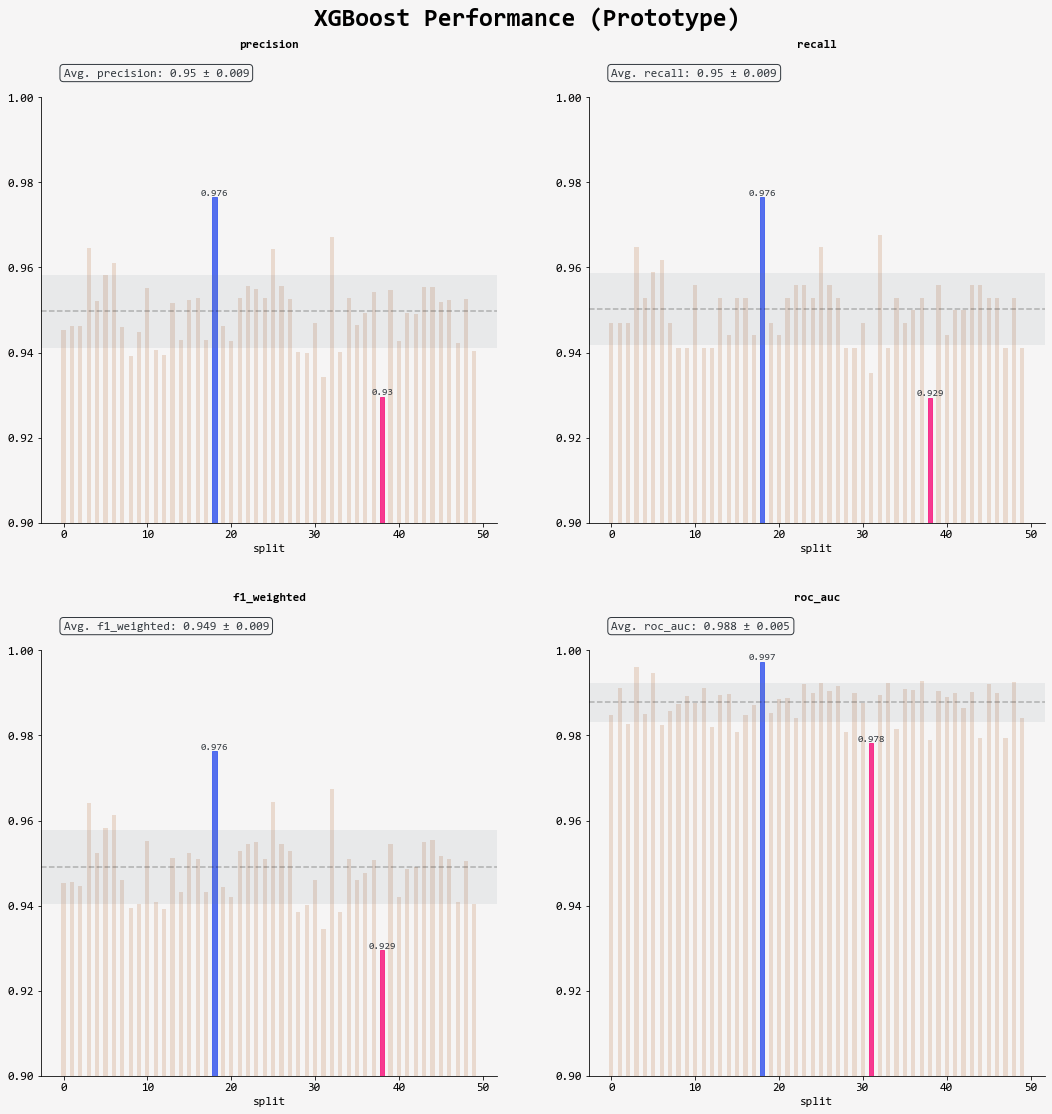

In [26]:
plot_cv_results(cv_results, suptitle="XGBoost Performance (Prototype)")

Optimisasi Hiperparameter
Model XGBoost memiliki 3 jenis hiperparameter utama:

Parameter umum: mendefinisikan perilaku umum dari model (misalnya, tipe booster, parameter pengoperasian seperti jumlah thread, verbosity, dll.).

Parameter booster: mengontrol pembelajaran model (misalnya, learning rate, regularisasi, parameter pohon, dll.).

Parameter tugas pembelajaran: mendefinisikan proses optimisasi (misalnya, objektif dan metrik evaluasi).

Parameter Umum:

booster: jenis model yang akan dijalankan pada setiap iterasi. Memiliki nilai opsional berikut:

gbtree (default) - membangun model berbasis pohon.
gblinear - membangun model linear.
dart - membangun model berbasis pohon dengan dropout.
Data kita tidak dapat dipisahkan secara linear, seperti biasanya, oleh karena itu kita akan menggunakan model berbasis pohon. Penggunaan dropout cenderung menghasilkan model dengan kemampuan generalisasi yang lebih baik, oleh karena itu kita akan mempertimbangkan baik gbtree maupun dart.

Parameter Booster:
eta: tingkat pembelajaran. Setelah setiap iterasi boosting, bobot baru ditentukan untuk daun-daun dan eta mengecilkan bobot ini, membuat model lebih tangguh. Nilai umum berada dalam rentang 0,01-0,2.
min_child_weight: menentukan jumlah minimal bobot yang diperlukan untuk observasi agar dapat membuat pemisahan. Nilai yang lebih tinggi mencegah model mempelajari relasi yang mungkin sangat spesifik untuk sampel tertentu yang dipilih untuk suatu pohon, tetapi nilai yang terlalu tinggi dapat menyebabkan underfitting.
max_depth: kedalaman maksimal setiap pohon. Nilai yang terlalu rendah dapat menyebabkan underfitting dan nilai yang terlalu tinggi dapat menyebabkan overfitting.
gamma: menentukan pengurangan kerugian minimal yang diperlukan untuk membuat pemisahan. Dengan demikian, nilai yang lebih tinggi membuat model lebih konservatif.
subsample: fraksi sampel (baris) yang digunakan secara acak pada setiap iterasi (yaitu, untuk setiap pohon). Nilai umum berada dalam rentang 0,5-1,0.
colsample_bytree: fraksi fitur (kolom) yang digunakan secara acak pada setiap iterasi (yaitu, untuk setiap pohon). Nilai umum berada dalam rentang 0,5-1,0.
alpha: mengontrol regularisasi L1 pada bobot model.
lambda: mengontrol regularisasi L2 pada bobot model.
scale_pos_weight: mengontrol keseimbangan bobot positif dan negatif, berguna untuk kelas yang tidak seimbang. Catatan ini hanya relevan untuk klasifikasi biner, sedangkan dalam tugas multi-klasifikasi yang kita hadapi, kita akan menggunakan pendekatan yang berbeda - bobot sampel.
Parameter Tugas Pembelajaran:
Biasanya dipilih secara otomatis berdasarkan data masukan dan tugas.
Strategi Umum untuk Mengoptimalkan Hiperparameter XGBoost
Kita akan mulai dengan mengatur nilai yang relatif tinggi untuk learning rate (misalnya, 0,1) dan mengatur nilai "tebakan" awal untuk parameter pohon. Kemudian kita akan mengoptimalkan n_estimators (jumlah putaran boosting) untuk nilai-nilai awal ini. Kita dapat menemukan nilai optimal ini dengan menggunakan xgboost.cv().
Untuk n_estimators yang ditemukan, kita akan mengoptimalkan max_depth dan min_child_weight.
Mengoptimalkan n_estimators lagi.
Mengoptimalkan gamma.
Mengoptimalkan n_estimators lagi.
Mengoptimalkan subsample dan colsample_bytree.
Mengoptimalkan n_estimators lagi.
Mengoptimalkan parameter regularisasi alpha dan lambda.
Mengoptimalkan n_estimators lagi.
Mengoptimalkan parameter DART rate_drop dan skip_drop.
Mengurangi learning rate.
Mengoptimalkan n_estimators lagi.
Dalam proses ini, kita akan mencoba kombinasi nilai hiperparameter yang berbeda dan mengoptimalkan mereka secara berurutan untuk meningkatkan performa model XGBoost.

### <u>Handling Class Imbalance</u>
Seperti disebutkan di atas, metode bawaan <code>XGBClassifier</code> untuk menangani ketidakseimbangan kelas (<code>scale_pos_weight</code>) hanya relevan untuk klasifikasi biner, sementara kita menghadapi masalah multi-kelas. Namun, kita dapat menggunakan parameter <code>fit</code> metode <code>sample_weight</code>, yang menetapkan bobot untuk setiap instance pelatihan.

Bobot harus ditentukan untuk setiap pemisahan, karena data pelatihan yang digunakan untuk menyesuaikan model sedikit berbeda pada setiap pemisahan tersebut (walaupun dengan distribusi kelas yang serupa, karena kami menggunakan teknik pengambilan sampel bertingkat).

In [27]:
clf = XGBClassifier(
    objective="multi:softprob",
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
)

In [28]:
from joblib import Parallel, delayed

def cross_validate_weighted(clf, X_train, y_train, cv=rskf, verbose=1):

    cv_results = {
        "split": [],
        "test_precision": [],
        "test_recall": [],
        "test_f1_weighted": [],
        "test_roc_auc": []
    }

    printcount = 0
    if verbose > 0:
        print("[START]")
    
    # Define a helper function for parallel processing
    def process_fold(i, idx_train, idx_test):
        nonlocal cv_results

        printcount += 1
        if printcount==verbose and verbose>0:
            print(f"Starting fold {i+1}/{cv.get_n_splits()}...")
            printcount = 0

        xtrain, ytrain = X_train[idx_train], y_train.iloc[idx_train].values
        xtest, ytest = X_train[idx_test], y_train.iloc[idx_test].values

        classes = np.unique(ytrain)
        classes.sort()

        # calculate class weights
        class_weight = compute_class_weight(class_weight="balanced", classes=classes, y=ytrain)
        class_weight_arr = [class_weight[int(c)] for c in ytrain]

        # train classifier
        clf.fit(xtrain, ytrain, sample_weight=class_weight_arr)

        # predict classes and probabilities
        y_pred = clf.predict(xtest)
        y_prob = clf.predict_proba(xtest)

        # update the cv_results dictionary with the current split number
        cv_results["split"].append(i)

        # calculate metrics
        cv_results["test_precision"].append(precision_score(ytest, y_pred, average="weighted"))
        cv_results["test_recall"].append(recall_score(ytest, y_pred, average="weighted"))
        cv_results["test_f1_weighted"].append(f1_score(ytest, y_pred, average="weighted"))
        cv_results["test_roc_auc"].append(roc_auc_score(ytest, y_prob, multi_class="ovo", average="weighted"))

    # Perform parallel processing using joblib
    Parallel(n_jobs=-1)(delayed(process_fold)(i, idx_train, idx_test) for i, (idx_train, idx_test) in enumerate(cv.split(X_train, y_train)))

    if verbose > 0:
        print("[END]")
    
    return pd.DataFrame(cv_results)


Multi processing


 mengimplementasikan fungsi cross_validate_weighted yang melakukan validasi silang dengan menggunakan XGBClassifier

Pada setiap lipatan, fungsi process_fold dipanggil untuk melatih dan menguji model secara terpisah. Fungsi process_fold mengambil indeks pelatihan dan pengujian, serta data pelatihan dan target. Kemudian, bobot kelas dihitung menggunakan fungsi compute_class_weight dan model clf dilatih menggunakan data pelatihan dan bobot kelas. Setelah melatih model, kelas dan probabilitas diprediksi untuk data pengujian, dan metrik evaluasi seperti presisi, recall, f1-score, dan ROC AUC dihitung dan disimpan dalam dictionary cv_results

jumlah proses yang akan digunakan untuk pemrosesan paralel ditentukan dalam variabel num_processes, dan kemudian fungsi cross_validate_weighted dipanggil dengan menggunakan multiprocessing untuk mempercepat proses validasi silang.


 jika num_processes diubah menjadi 2, maka akan ada dua proses yang berjalan secara paralel untuk memproses lipatan-lipatan validasi silang. Ini berarti setiap lipatan akan diproses secara bergantian oleh dua proses yang berbeda. Dalam konteks ini, validasi silang akan memanfaatkan dua prosesor atau inti CPU yang berbeda untuk mempercepat waktu eksekusi.

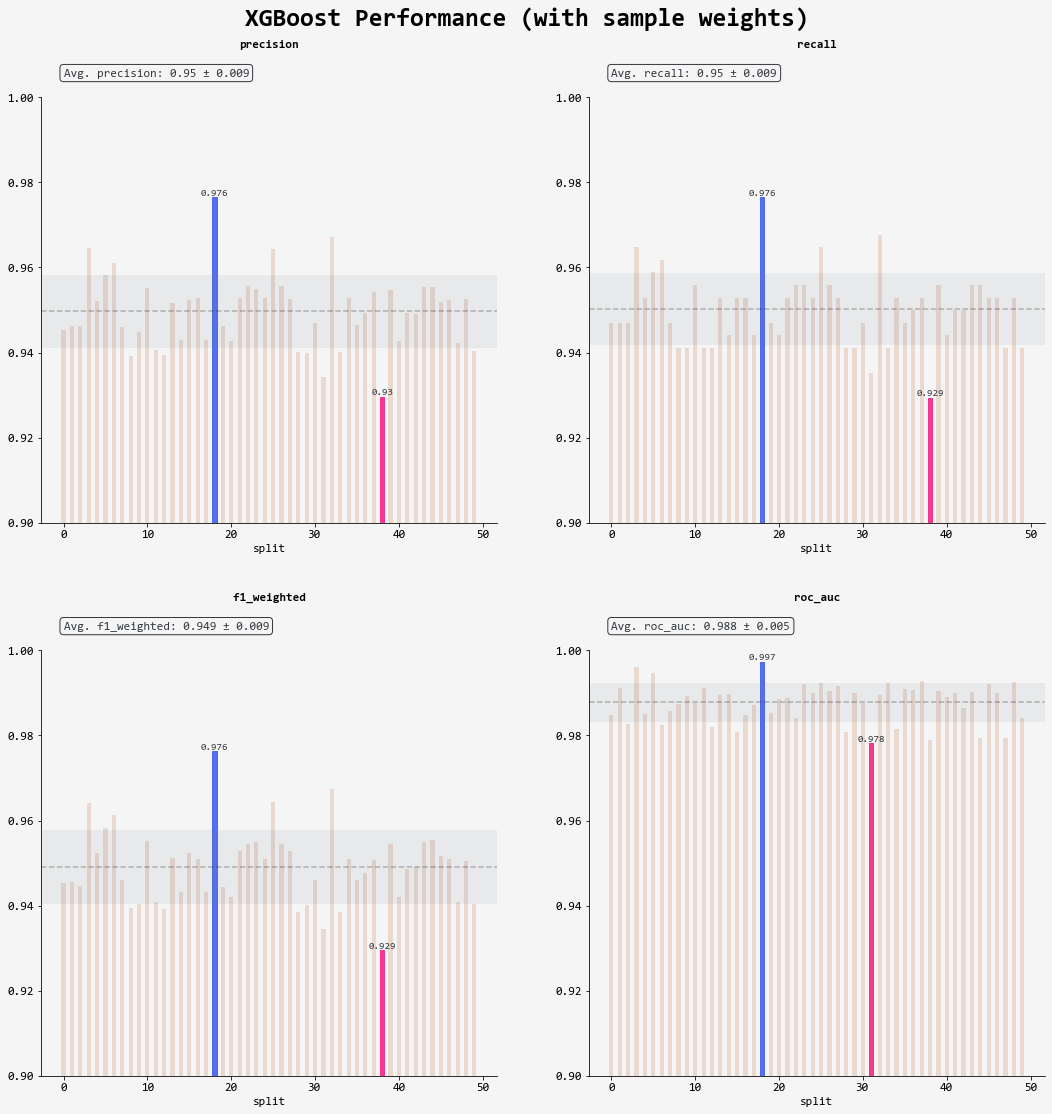

In [29]:
plot_cv_results(cv_results, suptitle="XGBoost Performance (with sample weights)")

In [30]:
def plot_cv_res_log(cv_res_log, suptitle=None, figsize=(18,18), hspace=0.3):
    
    cv_res_log_df = pd.DataFrame(
        {
            k: cv_res_log[k][
                cv_res_log[k].columns[
                    cv_res_log[k].columns.str.startswith("test_")
                ]
            ].mean()
            for k in cv_res_log.keys()
        }
    ).T
    
    scores = cv_res_log_df.columns.tolist()
    n_log = cv_res_log_df.shape[0]
    
    nrows, ncols = get_subplot_dims(len(scores))

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=hspace)    
    fig.patch.set_facecolor(COLORS["fig_bg"])

    for i, scr in enumerate(scores):
        metric = scr.replace("test_", "")
        ax = plt.subplot(nrows, ncols, i+1)
        b = ax.bar(cv_res_log_df.index, cv_res_log_df[scr], width=0.5, color=COLORS["plot_neut"], alpha=0.5)

        ax.set_title(metric, **FONT_KW["subplot_title_small"], pad=50)
        ax.set_xlabel("")
        ax.set_ylabel("")

        ax.set_xticks(
            ax.get_xticks(),
            [str_new_line(label, max_len=20, delimiter="_") for label in cv_res_log_df.index],
            **FONT_KW["plot_text_small"],
        )

        plt.yticks(**FONT_KW["plot_text"])
        
        idx_max = cv_res_log_df.index.get_loc(cv_res_log_df[scr].idxmax())
        idx_min = cv_res_log_df.index.get_loc(cv_res_log_df[scr].idxmin())

        b[idx_max].set_color(COLORS["class"][0])
        b[idx_min].set_color(COLORS["class"][2])
        b[idx_max].set_alpha(0.9)
        b[idx_min].set_alpha(0.9)

        labels = [""] * n_log
        labels[idx_max] = np.round(cv_res_log_df[scr].iloc[idx_max], 3)
        labels[idx_min] = np.round(cv_res_log_df[scr].iloc[idx_min], 3)

        ax.bar_label(b, labels=labels, **FONT_KW["plot_text"], color=COLORS["plot_text"])
        
        met_mean = cv_res_log_df[scr].mean()
        met_std = cv_res_log_df[scr].std()
        
        ax.axhline(met_mean, alpha=0.25, color="black", ls="--")
        ax.axhspan(met_mean-met_std, met_mean+met_std, facecolor="slategrey", alpha=0.1)
        
        ax.set_ylim([0.9, 1.0])
        
        ax.set_facecolor(COLORS["fig_bg"])
        for spine in ["right", "top"]:
            ax.spines[spine].set_visible(False)
        
        ax.text(
            0, 1.005,
            f"Avg. {metric}: {np.round(met_mean,3)} ± {np.round(met_std,3)}",
            **FONT_KW["plot_text"],
            color=COLORS["plot_text"],
            bbox={
                "boxstyle": "Round",
                "fill": False,
                "edgecolor": COLORS["plot_text"]
            }
        )
        
    if suptitle is not None:
        plt.suptitle(suptitle, y=1.01, **FONT_KW["plot_title"])
            
    plt.show()

In [31]:
plot_cv_res_log(cv_res_log, suptitle="Average CV Results", figsize=(15,10), hspace=0.5)

<Figure size 1080x720 with 0 Axes>

In [32]:
from joblib import Parallel, delayed

def cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=1):
    cv_results = {
        "split": [],
        "eval_res": [],
        "best_ntree_limit": [],
        "best_score": []
    }

    printcount = 0
    if verbose > 0:
        print("[START]")
        
    def process_fold(i, idx_train, idx_test):
        nonlocal printcount
        if printcount == verbose and verbose > 0:
            print(f"Starting fold {i+1}/{cv.get_n_splits()}...")
            printcount = 0

        xtrain, ytrain = X_train[idx_train], y_train.iloc[idx_train].values
        xtest, ytest = X_train[idx_test], y_train.iloc[idx_test].values

        classes = np.unique(ytrain)
        classes.sort()

        # calculate class weights
        class_weight = compute_class_weight(class_weight="balanced", classes=classes, y=ytrain)
        class_weight_arr = [class_weight[int(c)] for c in ytrain]

        # train classifier
        clf.fit(
            xtrain, ytrain,
            sample_weight=class_weight_arr,
            eval_set=[(xtest, ytest)],
            verbose=False
        )

        # update the cv_results dictionary with the current split evaluation results
        cv_results["split"].append(i)
        cv_results["eval_res"].append(clf.evals_result_["validation_0"])
        cv_results["best_ntree_limit"].append(clf.best_ntree_limit)
        cv_results["best_score"].append(clf.best_score)

    Parallel(n_jobs=-1, prefer="threads")(
        delayed(process_fold)(i, idx_train, idx_test)
        for i, (idx_train, idx_test) in enumerate(cv.split(X_train, y_train))
    )

    if verbose > 0:
        print("[END]")

    return pd.DataFrame(cv_results)


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
import numpy as np

SEED = 42
n_threads = 4

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

# Define the scoring metrics for cross-validation
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', average='weighted')
}

# Define the XGBoost model
clf = XGBClassifier(
    objective='multi:softprob',
    n_estimators=1000,
    max_depth=4,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    booster='dart',
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric='auc',
    early_stopping_rounds=50,
    n_jobs=n_threads
)

# Define the cross-validation scheme
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Perform cross-validation with early stopping using multi-threading
cv_results = cross_validate(clf, X_train, y_train, cv=cv, verbose=5, scoring=scoring, n_jobs=n_threads)

# Print the cross-validation results
print('CV Results:')
print('Precision:', np.mean(cv_results['test_precision']))
print('Recall:', np.mean(cv_results['test_recall']))
print('F1 Score:', np.mean(cv_results['test_f1']))
print('ROC AUC:', np.mean(cv_results['test_roc_auc']))


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.6s finished


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\training.py", line 186, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\callback.py", line 247, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\callback.py", line 247, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\callback.py", line 412, in after_iteration
    assert len(evals_log.keys()) >= 1, msg
AssertionError: Must have at least 1 validation dataset for early stopping.


In [81]:
def plot_cv_results_early_stop(cv_results, metric="auc", suptitle=None, figsize=(12,12)):
    n_splits = cv_results.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor(COLORS["fig_bg"])
    
    ax.set_title("XGBoost Boosting Rounds Optimization", **FONT_KW["plot_title"])
    ax.set_xlabel("n_estimators", **FONT_KW["plot_label"])
    ax.set_ylabel(metric, **FONT_KW["plot_label"])

    plt.xticks(**FONT_KW["plot_text"])
    plt.yticks(**FONT_KW["plot_text"])

    ax.set_facecolor(COLORS["fig_bg"])
    for spine in ["right", "top"]:
        ax.spines[spine].set_visible(False)

    for i in range(n_splits):
        y = cv_results["eval_res"][i][metric]
        x = range(len(y))
        
        ax.plot(
            x,
            y,
            color=COLORS["class"][0],
            alpha=0.05
        )

        ax.plot(
            cv_results["best_ntree_limit"][i],
            cv_results["best_score"][i],
            color=COLORS["class"][0],
            marker="o",
            markerfacecolor=COLORS["class"][0],
            markeredgecolor=COLORS["class_light"][0],
            markeredgewidth=0.8,
            markersize=8
        )

    
    x_mean = cv_results["best_ntree_limit"].mean()
    x_std = cv_results["best_ntree_limit"].std()
    ax.axvline(x_mean, alpha=0.3, color=COLORS["plot_text"], ls="--")
    ax.axvspan(x_mean-x_std, x_mean+x_std, facecolor=COLORS["class_light"][0], alpha=0.1)
    
    y_mean = cv_results["best_score"].mean()
    y_std = cv_results["best_score"].std()
    ax.axhline(y_mean, alpha=0.3, color=COLORS["plot_text"], ls="--")
    ax.axhspan(y_mean-y_std, y_mean+y_std, facecolor=COLORS["class_light"][0], alpha=0.1)
    
    ax.text(
        x_mean+x_std, y_mean-y_std,
        f"Avg. best n_estimators: {int(np.round(x_mean,0))} ± {np.round(x_std,1)}\n" +\
        f"with avg. {metric}: {np.round(y_mean,3)} ± {np.round(y_std,3)}",
        ha="left", va="top",
        **FONT_KW["plot_text"],
        color=COLORS["plot_text"],
        bbox={
            "boxstyle": "Round",
            "fill": False,
            "edgecolor": COLORS["plot_text"],
        }
    )
    
    ax.set_ylim([
        np.round(cv_results["best_score"].min(),2)-0.01,
        1.0
    ])
    plt.show()


In [83]:
plot_cv_results_early_stop(cv_results)

AttributeError: 'dict' object has no attribute 'shape'

implementasi dari fungsi plot_cv_results_early_stop_parallel yang menggunakan konsep multiprocessing untuk mempercepat proses plotting.

Kita akan menetapkan <b><code>n_estimators=250</code></b> dan melanjutkan ke langkah berikutnya: mengoptimalkan <code>max_depth</code> dan <code>min_child_weight</code>

Kode di atas adalah fungsi plot_cv_results_early_stop_parallel yang digunakan untuk menghasilkan visualisasi grafik garis dengan menggunakan hasil validasi silang (cross-validation) untuk memantau optimasi jumlah ronde penguatan dalam model XGBoost. Berikut adalah penjelasan lebih lanjut tentang kode tersebut:

Fungsi plot_cv_results_early_stop_parallel(cv_results, metric="auc", suptitle=None, figsize=(12,12), num_processes=4): Fungsi ini menerima argumen cv_results yang merupakan DataFrame yang berisi hasil validasi silang untuk memantau optimasi jumlah ronde penguatan, metric yang merupakan metrik evaluasi yang akan digunakan (default: "auc"), suptitle yang merupakan judul utama untuk plot (opsional), figsize yang merupakan ukuran figure (default: (12,12)), dan num_processes yang merupakan jumlah proses paralel yang akan digunakan (default: 4). Fungsi ini bertujuan untuk menghasilkan grafik garis yang memvisualisasikan optimasi jumlah ronde penguatan dalam model XGBoost.

Jumlah split dalam hasil validasi silang, n_splits, dihitung dari jumlah baris dalam DataFrame cv_results.

Objek figure fig dan axes ax dibuat dengan ukuran sesuai figsize yang diberikan. Warna latar belakang figure diset dengan fig.patch.set_facecolor(COLORS["fig_bg"]).

Pengaturan judul, label sumbu x, dan label sumbu y dilakukan menggunakan ax.set_title, ax.set_xlabel, dan ax.set_ylabel sesuai dengan kebutuhan. Label sumbu x dan y diatur menggunakan plt.xticks dan plt.yticks dengan parameter font yang ditentukan di FONT_KW["plot_text"].

Warna latar belakang axes diset dengan ax.set_facecolor(COLORS["fig_bg"]). Lalu, garis-garis tepi kanan (right) dan atas (top) dihilangkan dengan menggunakan loop for spine in ["right", "top"].

Fungsi process_fold didefinisikan untuk menggambar grafik garis untuk setiap split. Fungsi ini menerima argumen i yang merupakan indeks split.

Pada setiap iterasi, grafik garis dari hasil evaluasi dalam split tersebut digambar menggunakan ax.plot dengan menggunakan warna dari COLORS["class"][0] dan alpha 0.05.

Titik optimum pada grafik, yang menunjukkan jumlah ronde penguatan terbaik, digambar menggunakan ax.plot dengan menggunakan warna dari COLORS["class"][0], marker "o", dan warna wajah marker dari COLORS["class"][0].

Proses penggambaran grafik dilakukan secara paralel jika num_processes lebih dari 1. Pada kondisi ini, multiprocessing.Pool digunakan dengan jumlah proses sebanyak num_processes. Fungsi process_fold akan dieksekusi secara paralel menggunakan pool.map dengan argumen range(n_splits).

Jika num_processes sama dengan 1, maka penggambaran grafik dilakukan secara sekuensial menggunakan loop for dengan range(n_splits).

Terakhir, rata-rata dan standar deviasi jumlah ronde penguatan yang optimal, x_mean dan x_std, dihitung dari kolom "best_ntree_limit" dalam DataFrame cv_results.

In [34]:
def GridSearchCV_weighted(clf, X_train, y_train, param_grid, cv=rskf, verbose=1, print_res=False):

    grid = list(ParameterGrid(param_grid))
    n_search = len(grid)
    
    cv_results = {
        "i_grid": [],
        "split": [],
        "test_precision": [],
        "test_recall": [],
        "test_f1_weighted": [],
        "test_roc_auc": []
    }
    
    for param in param_grid.keys():
        cv_results[f"param_{param}"]=[]
    
    if verbose > 0:
            print("[START]")
    for i_grid, param_search in enumerate(grid):
        clf.set_params(**param_search)
        printcount = 0
        if verbose > 0:
            print(f"[START] param config {i_grid+1}/{n_search}...")
            print(f"{param_search}")
        for i, (idx_train, idx_test) in enumerate(cv.split(X_train, y_train)):
            printcount += 1
            if printcount==verbose and verbose>0:
                print(f"   Starting fold {i+1}/{cv.get_n_splits()}...")
                printcount = 0

            xtrain, ytrain = X_train[idx_train], y_train.iloc[idx_train].values
            xtest, ytest = X_train[idx_test], y_train.iloc[idx_test].values
            
            classes = np.unique(ytrain)
            classes.sort()

            # calculate class weights
            class_weight = compute_class_weight(class_weight="balanced", classes=classes, y=ytrain)
            class_weight_arr = [class_weight[int(c)] for c in ytrain]

            # train classifier
            clf.fit(xtrain, ytrain, sample_weight=class_weight_arr)

            # predict classes and probabilities
            y_pred = clf.predict(xtest)
            y_prob = clf.predict_proba(xtest)

            # update the cv_results dictionary with the current split number
            cv_results["i_grid"].append(i_grid)
            cv_results["split"].append(i)

            # calculate metrics
            test_precision = precision_score(ytest, y_pred, average="weighted")
            test_recall = recall_score(ytest, y_pred, average="weighted")
            test_f1_weighted = f1_score(ytest, y_pred, average="weighted")
            test_roc_auc = roc_auc_score(ytest, y_prob, multi_class="ovo", average="weighted")
            
            if print_res:
                print(f"      test_precision={test_precision}")
                print(f"      test_recall={test_recall}")
                print(f"      test_f1_weighted={test_f1_weighted}")
                print(f"      test_roc_auc={test_roc_auc}")
            
            # add metrics to cv_results
            cv_results["test_precision"].append(test_precision)
            cv_results["test_recall"].append(test_recall)
            cv_results["test_f1_weighted"].append(test_f1_weighted)
            cv_results["test_roc_auc"].append(test_roc_auc)
            
            for param in param_search.keys():
                cv_results[f"param_{param}"].append(clf.get_params()[param])
            
        if verbose > 0:
            print(f"[END] param config {i_grid+1}/{n_search}")
    
    if verbose > 0:
            print("[END]")
    return pd.DataFrame(cv_results)

In [35]:
param_grid = {
    "max_depth": np.arange(2, 9),
    "min_child_weight": np.arange(1, 6)
}

In [36]:
from sklearn.externals import joblib

def GridSearchCV_weighted_parallel(clf, X_train, y_train, param_grid, cv=rskf, verbose=1, print_res=False, n_jobs=1):
    grid = list(ParameterGrid(param_grid))
    n_search = len(grid)

    cv_results = {
        "i_grid": [],
        "split": [],
        "test_precision": [],
        "test_recall": [],
        "test_f1_weighted": [],
        "test_roc_auc": []
    }

    for param in param_grid.keys():
        cv_results[f"param_{param}"] = []

    if verbose > 0:
        print("[START]")

    def process_param_search(i_grid, param_search):
        clf.set_params(**param_search)
        printcount = 0

        if verbose > 0:
            print(f"[START] param config {i_grid+1}/{n_search}...")
            print(f"{param_search}")

        for i, (idx_train, idx_test) in enumerate(cv.split(X_train, y_train)):
            printcount += 1
            if printcount == verbose and verbose > 0:
                print(f"   Starting fold {i+1}/{cv.get_n_splits()}...")
                printcount = 0

            xtrain, ytrain = X_train[idx_train], y_train.iloc[idx_train].values
            xtest, ytest = X_train[idx_test], y_train.iloc[idx_test].values

            classes = np.unique(ytrain)
            classes.sort()

            # calculate class weights
            class_weight = compute_class_weight(class_weight="balanced", classes=classes, y=ytrain)
            class_weight_arr = [class_weight[int(c)] for c in ytrain]

            # train classifier
            clf.fit(xtrain, ytrain, sample_weight=class_weight_arr)

            # predict classes and probabilities
            y_pred = clf.predict(xtest)
            y_prob = clf.predict_proba(xtest)

            # update the cv_results dictionary with the current split number
            cv_results["i_grid"].append(i_grid)
            cv_results["split"].append(i)

            # calculate metrics
            test_precision = precision_score(ytest, y_pred, average="weighted")
            test_recall = recall_score(ytest, y_pred, average="weighted")
            test_f1_weighted = f1_score(ytest, y_pred, average="weighted")
            test_roc_auc = roc_auc_score(ytest, y_prob, multi_class="ovo", average="weighted")

            if print_res:
                print(f"      test_precision={test_precision}")
                print(f"      test_recall={test_recall}")
                print(f"      test_f1_weighted={test_f1_weighted}")
                print(f"      test_roc_auc={test_roc_auc}")

            # add metrics to cv_results
            cv_results["test_precision"].append(test_precision)
            cv_results["test_recall"].append(test_recall)
            cv_results["test_f1_weighted"].append(test_f1_weighted)
            cv_results["test_roc_auc"].append(test_roc_auc)

            for param in param_search.keys():
                cv_results[f"param_{param}"].append(clf.get_params()[param])

        if verbose > 0:
            print(f"[END] param config {i_grid+1}/{n_search}")

    joblib.Parallel(n_jobs=n_jobs)(
        joblib.delayed(process_param_search)(i_grid, param_search)
        for i_grid, param_search in enumerate(grid)
    )

    if verbose > 0:
        print("[END]")

    return pd.DataFrame(cv_results)


ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\externals\__init__.py)

In [37]:
def plot_GridSearchCV_weighted(cv_results, suptitle=None, figsize=(18,18), hspace=0.3, wspace=0.3):
    
    scores = cv_results.columns[cv_results.columns.str.startswith("test_")].tolist()
    params = cv_results.columns[cv_results.columns.str.startswith("param_")].tolist()

    n_grid = cv_results["i_grid"].nunique()

    df_mean = cv_results.groupby("i_grid").mean()
    df_std = cv_results.groupby("i_grid").std()

    nrows, ncols = get_subplot_dims(len(scores))

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=hspace, wspace=wspace)    
    fig.patch.set_facecolor(COLORS["fig_bg"])

    for i, scr in enumerate(scores):
        metric = scr.replace("test_", "")
        ax = plt.subplot(nrows, ncols, i+1)

        yerr = df_std[scr] / np.sqrt(n_grid)

        b = ax.bar(
            range(n_grid),
            df_mean[scr],
            yerr=yerr,
            width=0.5,
            color=COLORS["plot_neut"],
            alpha=0.5,
            error_kw={
                "ecolor": COLORS["plot_text"],
                "alpha": 0.25,
                "capsize": 2
            }
        )

        ax.set_title(metric, **FONT_KW["subplot_title_small"], pad=20)
        ax.set_xlabel("i_grid", **FONT_KW["plot_text"])
        ax.set_ylabel("")

        plt.xticks(**FONT_KW["plot_text"])
        plt.yticks(**FONT_KW["plot_text"])

#         idx_max = df_mean[scr].idxmax()
#         idx_min = df_mean[scr].idxmin()        

#         b[idx_max].set_color(COLORS["class"][0])
#         b[idx_min].set_color(COLORS["class"][2])
#         b[idx_max].set_alpha(0.9)
#         b[idx_min].set_alpha(0.9)
        
        labels = [""] * n_grid
        
        idx_max = df_mean[scr].nlargest(3).index.tolist()
        for idx in idx_max:
            b[idx].set_color(COLORS["class"][0])
            b[idx].set_alpha(0.9)
            labels[idx] = np.round(df_mean[scr][idx], 3)

        
#         labels[idx_max] = np.round(df_mean[scr].iloc[idx_max], 3)
#         labels[idx_min] = np.round(df_mean[scr].iloc[idx_min], 3)

        ax.bar_label(b, labels=labels, **FONT_KW["plot_text_small"], color=COLORS["plot_text"])

        met_mean = df_mean[scr].mean()
        met_std = df_mean[scr].std()

        ax.axhline(met_mean, alpha=0.25, color="black", ls="--")
        ax.axhspan(met_mean-met_std, met_mean+met_std, facecolor="slategrey", alpha=0.1)

        ax.set_ylim([df_mean[scr].min()-0.01, 1.0])

        ax.set_facecolor(COLORS["fig_bg"])
        for spine in ["right", "top"]:
            ax.spines[spine].set_visible(False)

        ind_top_params = df_mean[scr].nlargest(3).index
        txt = ""
        for ind_ in ind_top_params:
            for param in params:
                name = param.replace("param_", "")
                val = df_mean[f"{param}"][ind_]
                txt += f"{name}={val}, "
            scr_val = df_mean[scr][ind_]
            txt += f"{scr}: {np.round(scr_val, 5)}\n"

        ax.text(
            0, 1.0,
            "Top 3 params:\n" +\
            txt,
            va="top",
            **FONT_KW["plot_text"],
            color=COLORS["plot_text"],
            bbox={
                "boxstyle": "Round",
                "fill": False,
                "edgecolor": COLORS["plot_text"]
            }
        )

    if suptitle is not None:
        plt.suptitle(suptitle, y=0.95, **FONT_KW["plot_title"])
        
    plt.show()

In [38]:
plot_GridSearchCV_weighted(cv_results, suptitle="XGBoost Hyp. Opt. (max_depth, min_child_weight)")

AttributeError: 'dict' object has no attribute 'columns'

In [ ]:
cv_results.to_csv("cv_results_gridsearch_maxdepth.csv")

Kita akan menetapkan <b><code>max_depth=8</code></b>, <b><code>min_child_weight=1</code></b> dan melanjutkan ke langkah berikutnya: mengoptimalkan <b>< code>n_estimators</code></b> sekali lagi.

<b><i><mark>NOTE : </mark></i></b> bahwa hasil terbaik dalam CV ditemukan untuk nilai maksimal dan minimal dari <code>max_depth</code>, <code>min_child_weight </code>, masing-masing, di kotak pencarian kami. Kami seharusnya sekarang menyediakan kotak pencarian yang lebih sempit di sekitar nilai-nilai ini, tetapi akan berlanjut karena kendala waktu.

[START]
Starting fold 5/50...
Starting fold 10/50...
Starting fold 15/50...
Starting fold 20/50...
Starting fold 25/50...
Starting fold 30/50...
Starting fold 35/50...
Starting fold 40/50...
Starting fold 45/50...
Starting fold 50/50...
[END]


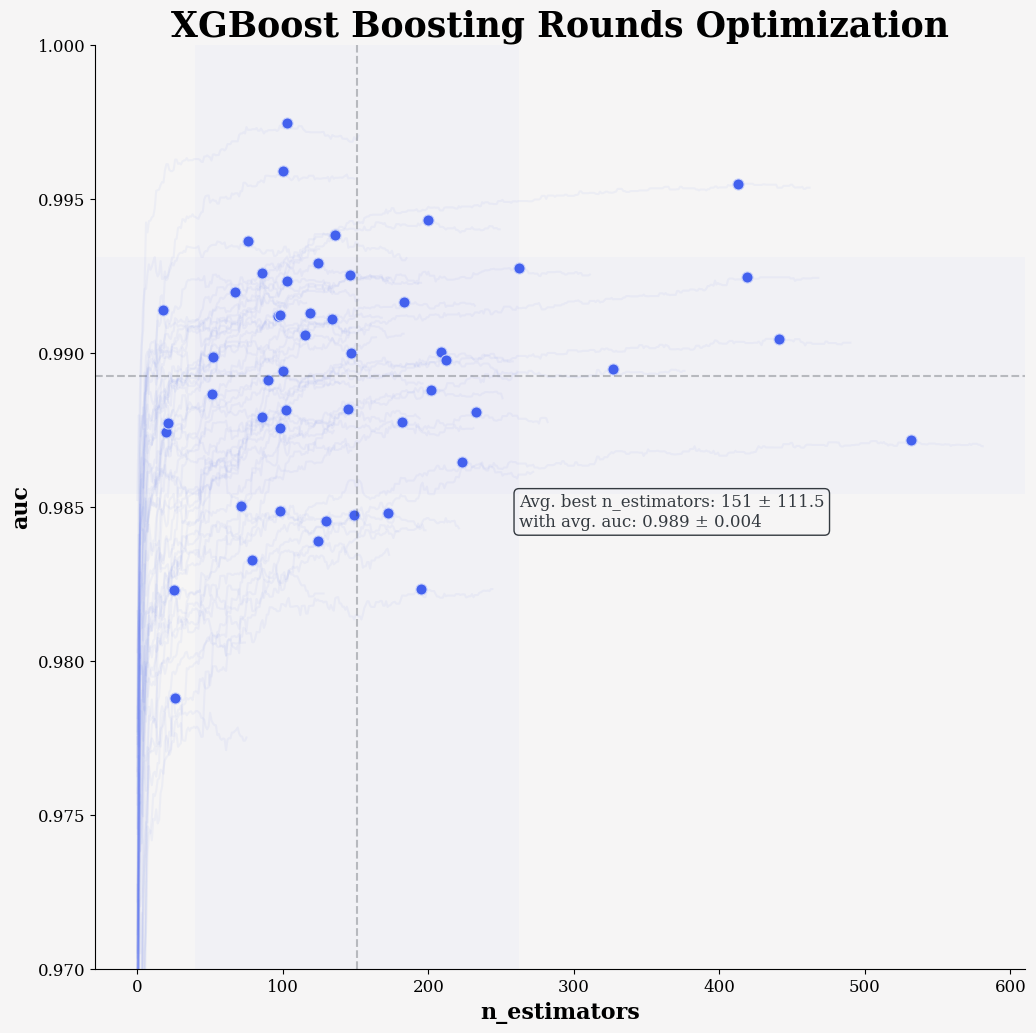

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    n_estimators=1000,
    max_depth=8,
    min_child_weight=1,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
    early_stopping_rounds=50
)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
cv_res_early_stop = cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=5)
plot_cv_results_early_stop(cv_res_early_stop)

Kita akan menetapkan <b><code>n_estimators=150</code></b> dan melanjutkan ke langkah berikutnya: mengoptimalkan <code>gamma</code>

[START]
[START] param config 1/11...
{'gamma': 0.0}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 1/11
[START] param config 2/11...
{'gamma': 0.01}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 2/11
[START] param config 3/11...
{'gamma': 0.02}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 3/11
[START] param config 4/11...
{'gamma': 0.03}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 4/11
[START] param config 5/11...
{'gamma': 0.04}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 5/11
[START] param config 6/11...
{'gamma': 0.05}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting

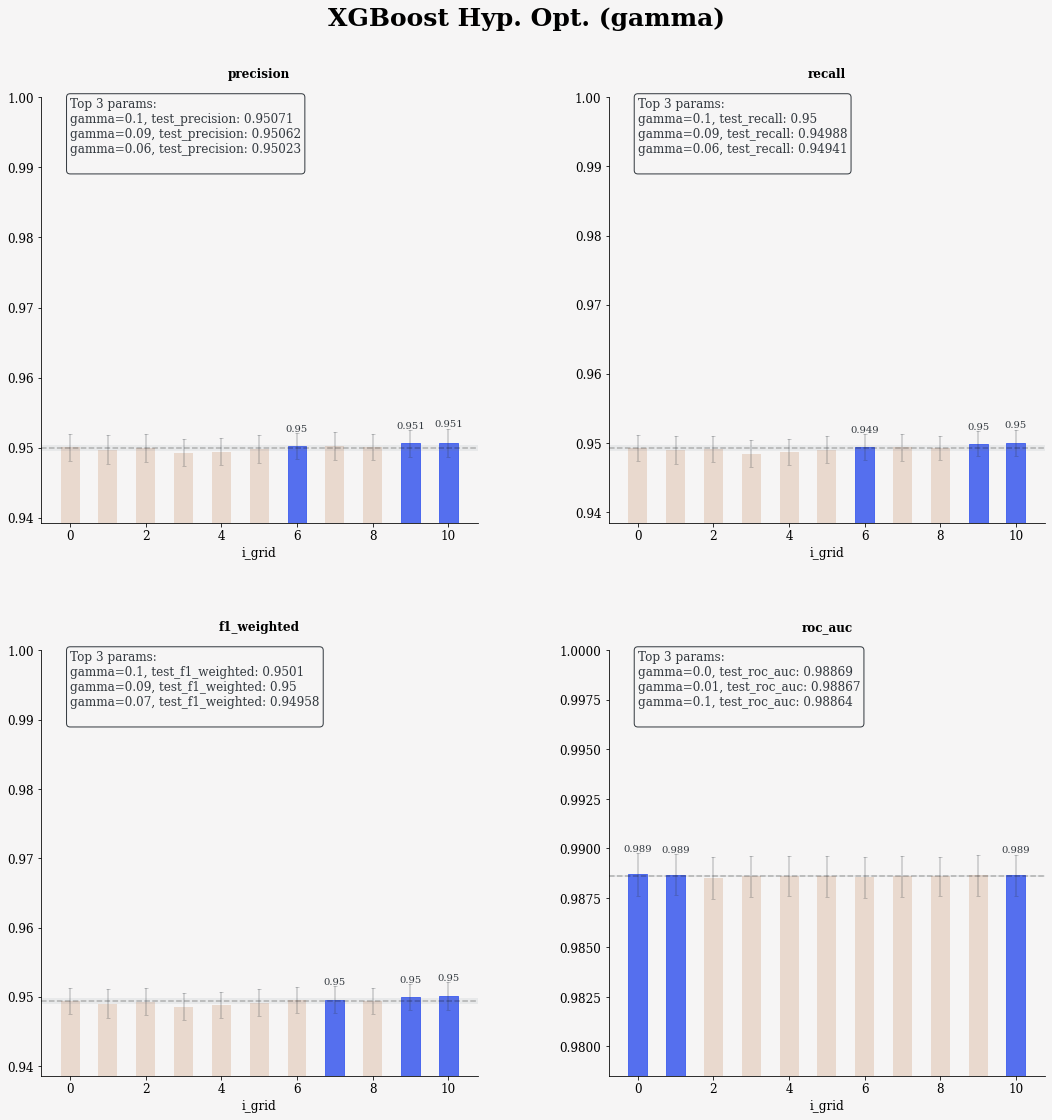

In [ ]:
param_grid = {
    "gamma": np.arange(0, 0.11, 0.01),
}

clf = XGBClassifier(
    objective="multi:softprob",
    n_estimators=150,
    max_depth=8,
    min_child_weight=1,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
)

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=SEED)
cv_results = GridSearchCV_weighted(clf, X_train, y_train, param_grid, cv=rskf, verbose=5)
plot_GridSearchCV_weighted(cv_results, suptitle="XGBoost Hyp. Opt. (gamma)")
cv_results.to_csv("cv_results_gridsearch_gamma.csv")

Kita akan menetapkan <b><code>gamma=0.1</code></b> dan mengoptimalkan <b><code>n_estimators</code></b> sekali lagi.

[START]
Starting fold 5/50...
Starting fold 10/50...
Starting fold 15/50...
Starting fold 20/50...
Starting fold 25/50...
Starting fold 30/50...
Starting fold 35/50...
Starting fold 40/50...
Starting fold 45/50...
Starting fold 50/50...
[END]


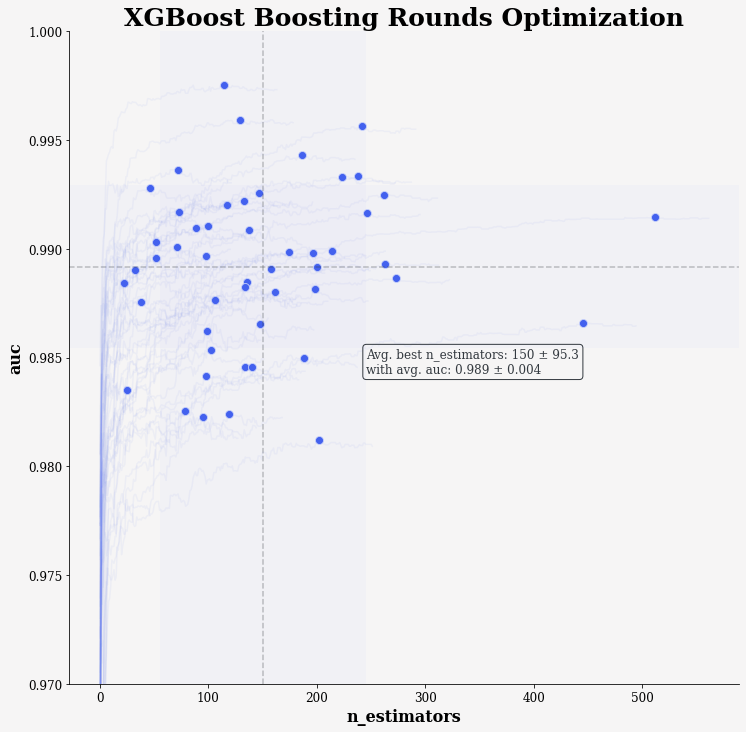

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
    early_stopping_rounds=50
)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
cv_res_early_stop = cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=5)
plot_cv_results_early_stop(cv_res_early_stop)

Kita akan melanjutkan dengan <b><code>n_estimators=150</code></b> dan mengoptimalkan <code>subsample</code> dan <code>colsample_bytree</code>

[START]
[START] param config 1/25...
{'colsample_bytree': 0.5, 'subsample': 0.5}
   Starting fold 10/20...
   Starting fold 20/20...
[END] param config 1/25
[START] param config 2/25...
{'colsample_bytree': 0.5, 'subsample': 0.6}
   Starting fold 10/20...
   Starting fold 20/20...
[END] param config 2/25
[START] param config 3/25...
{'colsample_bytree': 0.5, 'subsample': 0.7}
   Starting fold 10/20...
   Starting fold 20/20...
[END] param config 3/25
[START] param config 4/25...
{'colsample_bytree': 0.5, 'subsample': 0.7999999999999999}
   Starting fold 10/20...
   Starting fold 20/20...
[END] param config 4/25
[START] param config 5/25...
{'colsample_bytree': 0.5, 'subsample': 0.8999999999999999}
   Starting fold 10/20...
   Starting fold 20/20...
[END] param config 5/25
[START] param config 6/25...
{'colsample_bytree': 0.6, 'subsample': 0.5}
   Starting fold 10/20...
   Starting fold 20/20...
[END] param config 6/25
[START] param config 7/25...
{'colsample_bytree': 0.6, 'subsample': 

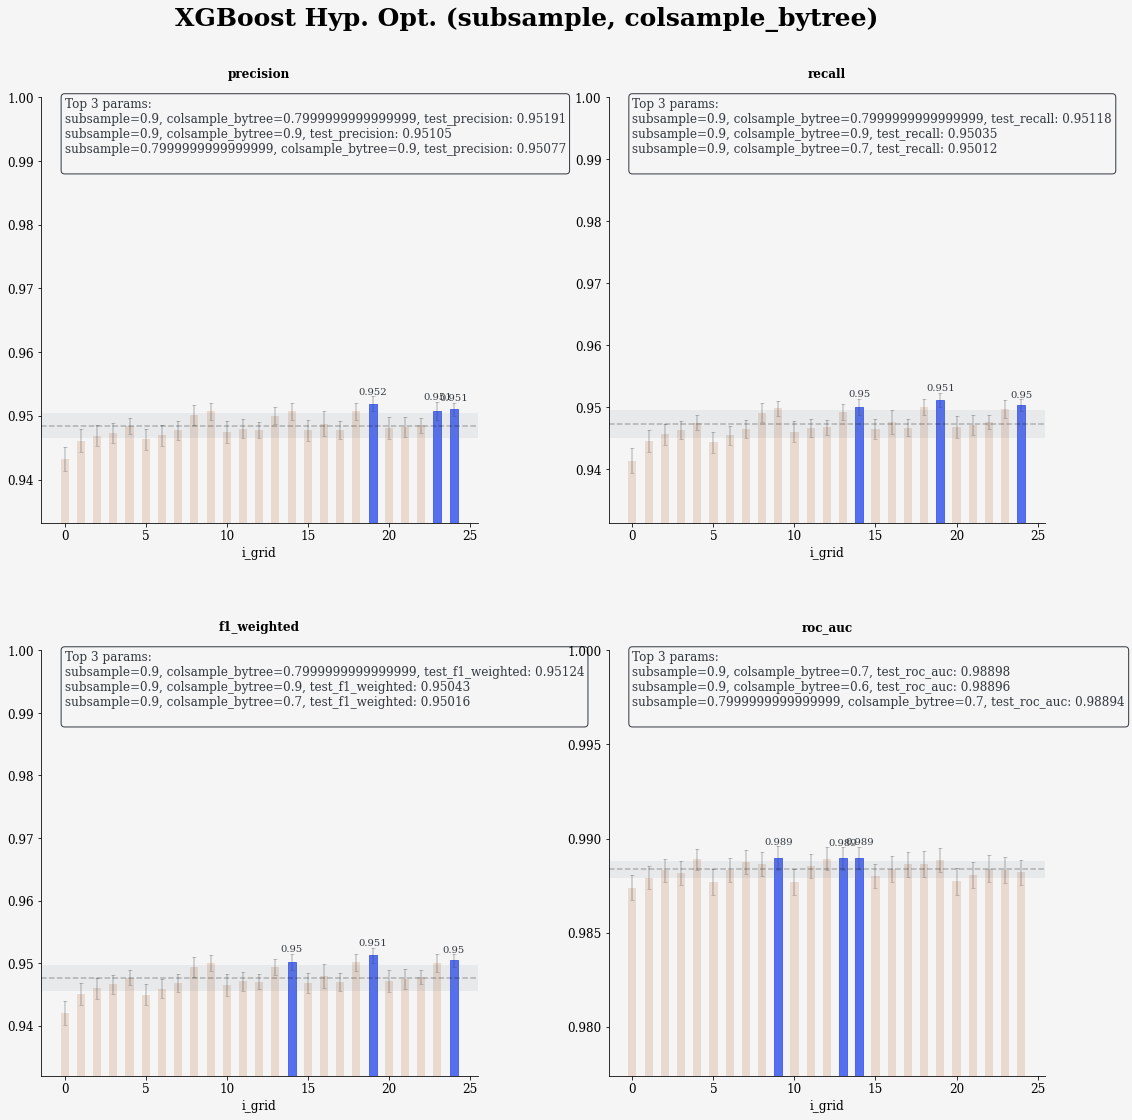

In [ ]:
param_grid = {
    "subsample": np.arange(0.5, 0.91, 0.1),
    "colsample_bytree": np.arange(0.5, 0.91, 0.1),
}

clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=150,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
)

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=SEED)
cv_results = GridSearchCV_weighted(clf, X_train, y_train, param_grid, cv=rskf, verbose=10)
plot_GridSearchCV_weighted(cv_results, suptitle="XGBoost Hyp. Opt. (subsample, colsample_bytree)")
cv_results.to_csv("cv_results_gridsearch_subsample.csv")

Kita akan menetapkan <b><code>subsample=0.9</code></b>, <b><code>colsample_bytree=0.7</code></b> dan mengoptimalkan <b><code>n_estimators</code ></b> sekali lagi.

[START]
Starting fold 5/50...
Starting fold 10/50...
Starting fold 15/50...
Starting fold 20/50...
Starting fold 25/50...
Starting fold 30/50...
Starting fold 35/50...
Starting fold 40/50...
Starting fold 45/50...
Starting fold 50/50...
[END]


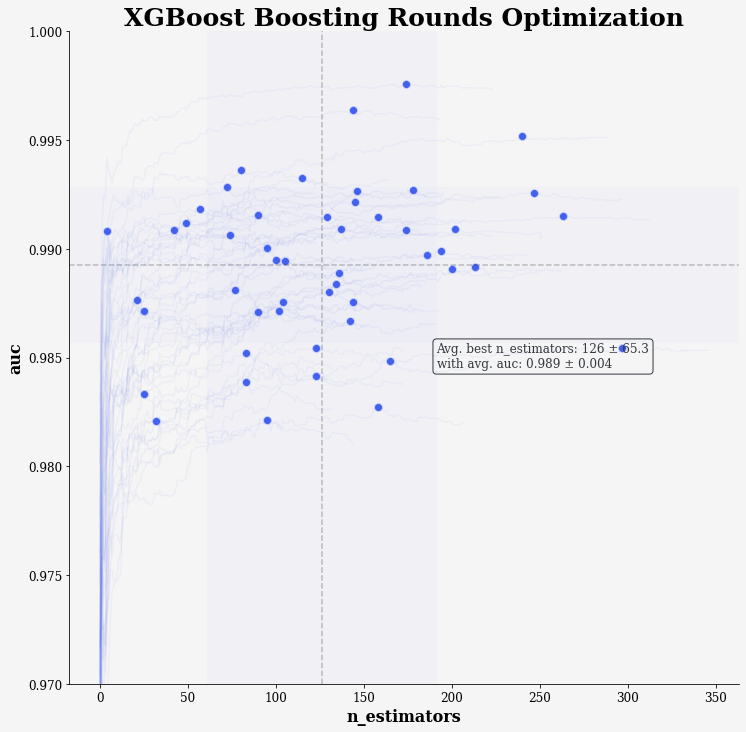

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
    early_stopping_rounds=50
)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
cv_res_early_stop = cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=5)
plot_cv_results_early_stop(cv_res_early_stop)

Kita akan menyetel <b><code>n_estimators=125</code></b> dan mengoptimalkan <code>alpha</code> dan <code>lambda</code>

[START]
[START] param config 1/36...
{'reg_alpha': 1e-05, 'reg_lambda': 1e-05}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 1/36
[START] param config 2/36...
{'reg_alpha': 1e-05, 'reg_lambda': 0.01}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 2/36
[START] param config 3/36...
{'reg_alpha': 1e-05, 'reg_lambda': 0.1}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 3/36
[START] param config 4/36...
{'reg_alpha': 1e-05, 'reg_lambda': 1}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 4/36
[START] param config 5/36...
{'reg_alpha': 1e-05, 'reg_lambda': 10}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 5/36
[START] para

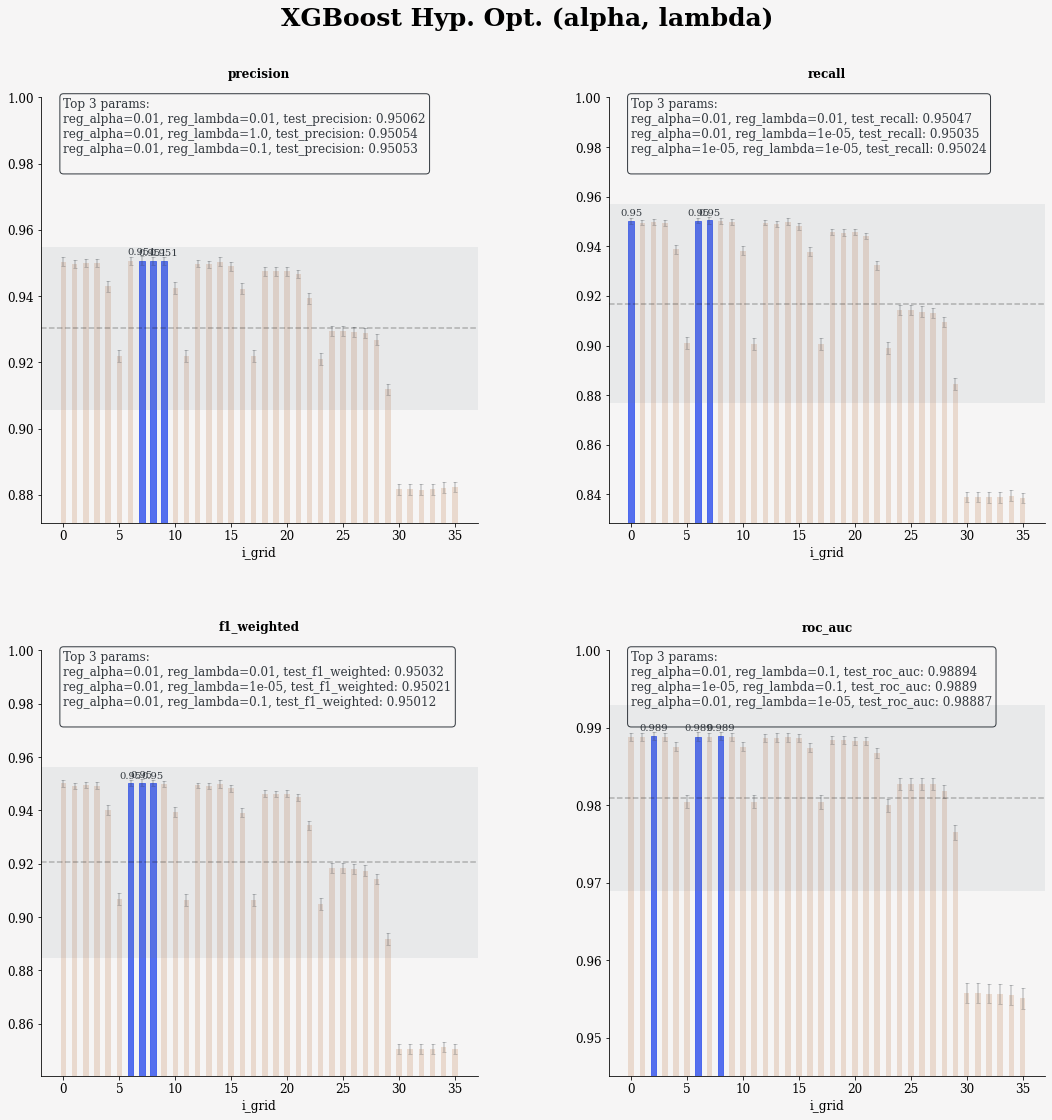

In [ ]:
param_grid = {
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}

clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=125,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
)

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=SEED)
cv_results = GridSearchCV_weighted(clf, X_train, y_train, param_grid, cv=rskf, verbose=5)
plot_GridSearchCV_weighted(cv_results, suptitle="XGBoost Hyp. Opt. (alpha, lambda)")
cv_results.to_csv("cv_results_gridsearch_alpha.csv")

Kita akan menetapkan <b><code>alpha=0.01</code></b>, dan mempersempit ruang pencarian kami untuk <code>lambda</code>:

[START]
[START] param config 1/24...
{'reg_lambda': 0.005}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 1/24
[START] param config 2/24...
{'reg_lambda': 0.01}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 2/24
[START] param config 3/24...
{'reg_lambda': 0.015}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 3/24
[START] param config 4/24...
{'reg_lambda': 0.02}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 4/24
[START] param config 5/24...
{'reg_lambda': 0.025}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 5/24
[START] param config 6/24...
{'reg_lambda': 0.030000000000000002}
   Starting fold 5/20...
   Starting f

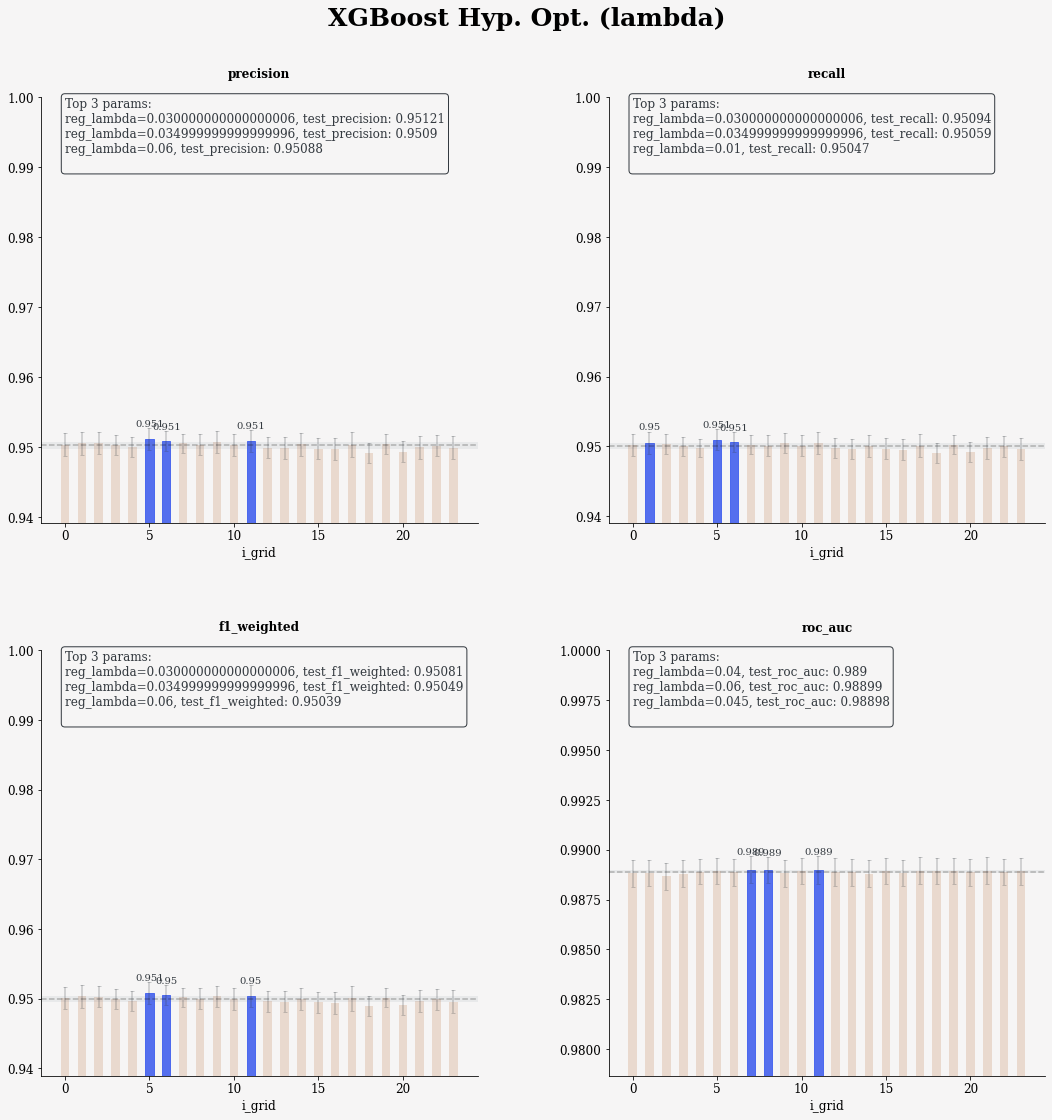

In [ ]:
param_grid = {
    "reg_lambda": np.arange(0.005, 0.125, 0.005)
}

clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=125,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
)

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=SEED)
cv_results = GridSearchCV_weighted(clf, X_train, y_train, param_grid, cv=rskf, verbose=5)
plot_GridSearchCV_weighted(cv_results, suptitle="XGBoost Hyp. Opt. (lambda)")
cv_results.to_csv("cv_results_gridsearch_lambda.csv")

Kita akan menyetel <b><code>lambda=0.03</code></b> dan menyempurnakan <code>n_estimators</code> lagi:

[START]
Starting fold 5/50...
Starting fold 10/50...
Starting fold 15/50...
Starting fold 20/50...
Starting fold 25/50...
Starting fold 30/50...
Starting fold 35/50...
Starting fold 40/50...
Starting fold 45/50...
Starting fold 50/50...
[END]


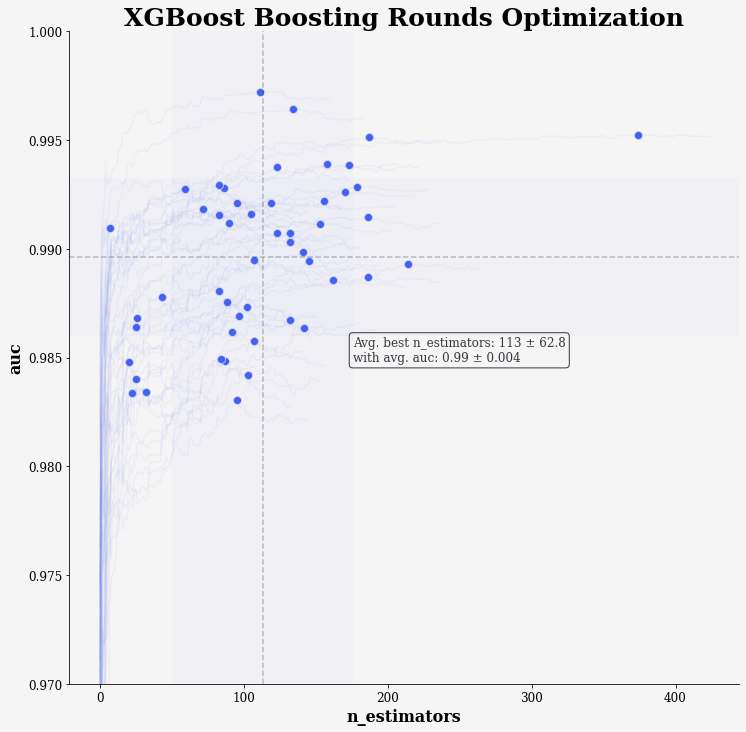

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    reg_lambda=0.03,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.5,
    seed=SEED,
    eval_metric="auc",
    early_stopping_rounds=50
)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
cv_res_early_stop = cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=5)
plot_cv_results_early_stop(cv_res_early_stop)

 Kita akan menetapkan <b><code>n_estimators=115</code></b> dan terus mengoptimalkan parameter DART <code>rate_drop</code> dan <code>skip_drop</code>.

[START]
[START] param config 1/35...
{'rate_drop': 0.0, 'skip_drop': 0.0}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 1/35
[START] param config 2/35...
{'rate_drop': 0.0, 'skip_drop': 0.1}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 2/35
[START] param config 3/35...
{'rate_drop': 0.0, 'skip_drop': 0.2}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 3/35
[START] param config 4/35...
{'rate_drop': 0.0, 'skip_drop': 0.30000000000000004}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 4/35
[START] param config 5/35...
{'rate_drop': 0.0, 'skip_drop': 0.4}
   Starting fold 5/20...
   Starting fold 10/20...
   Starting fold 15/20...
   Starting fold 20/20...
[END] param config 5/35
[START] par

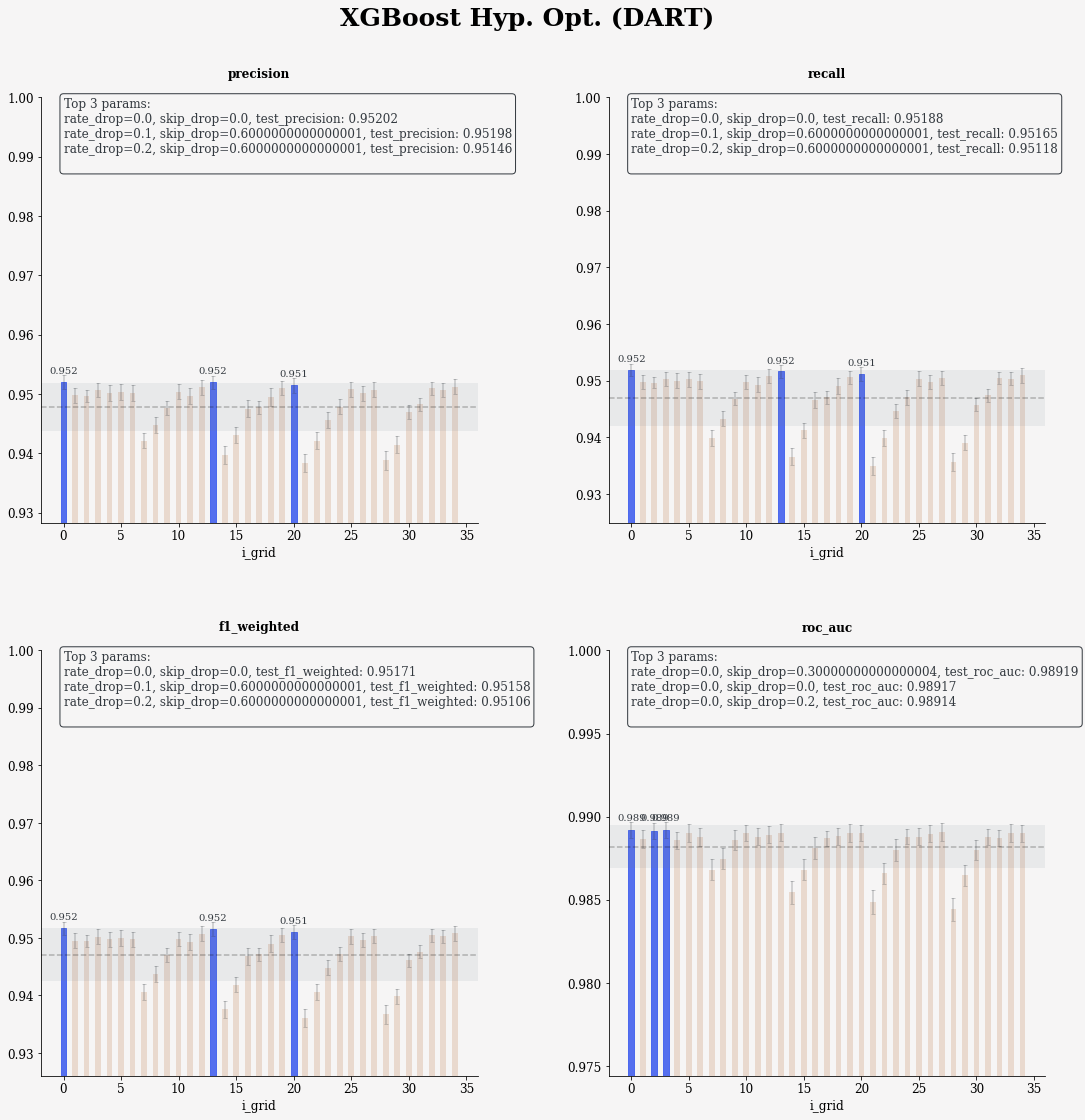

In [ ]:
param_grid = {
    "rate_drop": np.arange(0, 0.5, 0.1),
    "skip_drop": np.arange(0, 0.7, 0.1),
}

clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.1,
    n_estimators=115,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    reg_lambda=0.03,
    booster="dart",
    seed=SEED,
    eval_metric="auc",
)

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=SEED)
cv_results = GridSearchCV_weighted(clf, X_train, y_train, param_grid, cv=rskf, verbose=5)
plot_GridSearchCV_weighted(cv_results, suptitle="XGBoost Hyp. Opt. (DART)")
cv_results.to_csv("cv_results_gridsearch_dart.csv")

Menggunakan dropout dengan DART tidak meningkatkan performa model, karenanya kita akan memilih <code>booster=gbtree</code>, tanpa <code>skip_drop</code> atau <code>rate_drop</code>. Kita sekarang dapat mengurangi <code>learning_rate</code> dan menyetel <code>n_estimators</code> sesuai:

[START]
Starting fold 5/50...
Starting fold 10/50...
Starting fold 15/50...
Starting fold 20/50...
Starting fold 25/50...
Starting fold 30/50...
Starting fold 35/50...
Starting fold 40/50...
Starting fold 45/50...
Starting fold 50/50...
[END]


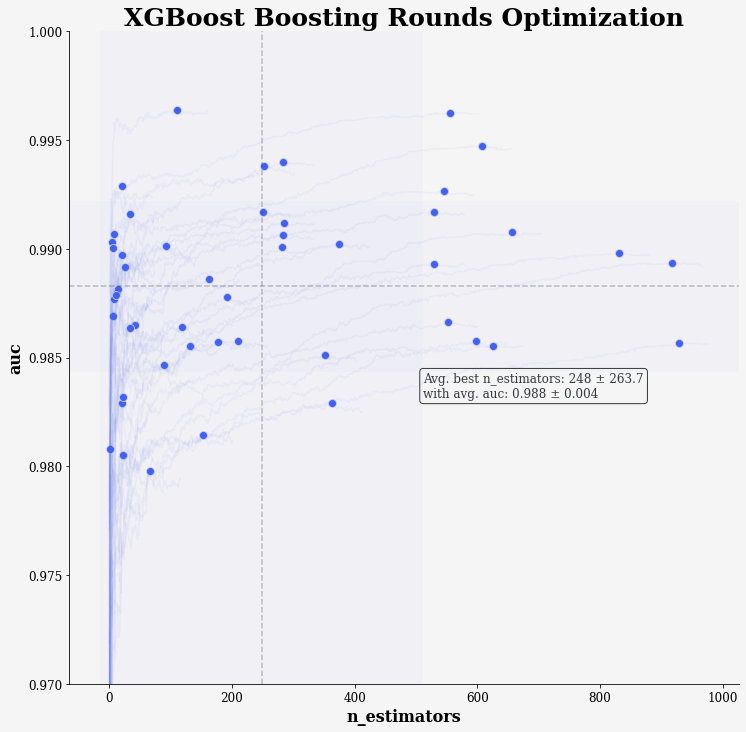

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    reg_lambda=0.03,
    booster="gbtree",
    seed=SEED,
    eval_metric="auc",
    early_stopping_rounds=50
)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
cv_res_early_stop = cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=5)
plot_cv_results_early_stop(cv_res_early_stop)

For comparison, we can tune <code>n_estimators</code> with DART:

[START]
Starting fold 5/50...
Starting fold 10/50...
Starting fold 15/50...
Starting fold 20/50...
Starting fold 25/50...
Starting fold 30/50...
Starting fold 35/50...
Starting fold 40/50...
Starting fold 45/50...
Starting fold 50/50...
[END]


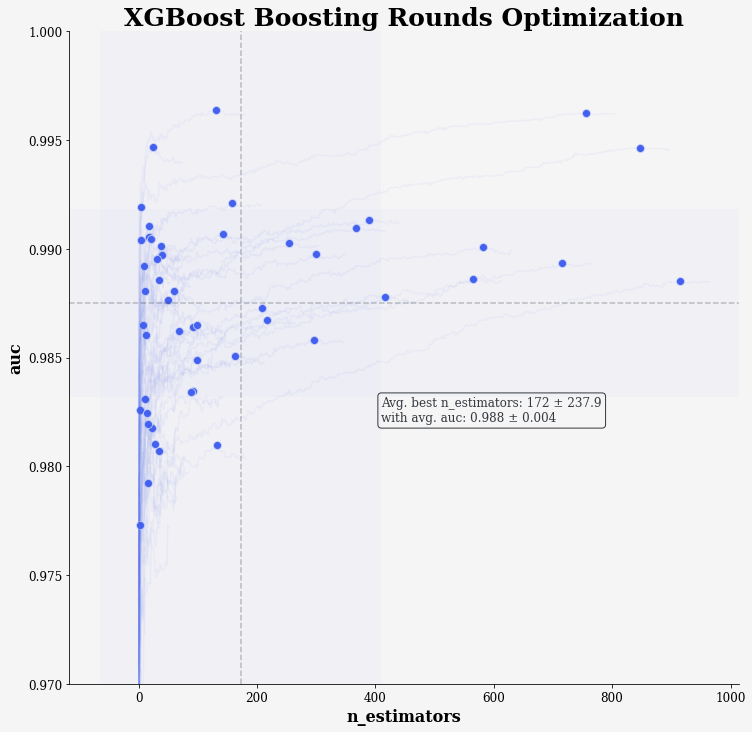

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    reg_lambda=0.03,
    booster="dart",
    rate_drop=0.1,skip_drop=0.6,
    seed=SEED,
    eval_metric="auc",
    early_stopping_rounds=50
)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
cv_res_early_stop = cv_weighted_early_stop(clf, X_train, y_train, cv=rskf, verbose=5)
plot_cv_results_early_stop(cv_res_early_stop)

Saat menggunakan DART, nilai rata-rata <code>n_estimators</code>, seperti yang disetel dengan penghentian lebih awal, lebih rendah, sedikit lebih konsisten (variasi lebih rendah), dan menghasilkan skor ROC AUC rata-rata yang serupa. Kami akan melanjutkan dengan opsi DART di:

In [ ]:
clf = XGBClassifier(
    objective="multi:softprob",
    learning_rate=0.01,
    n_estimators=175,
    max_depth=8,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    reg_lambda=0.03,
    booster="dart",
    rate_drop=0.1,
    skip_drop=0.6,
    seed=SEED,
    eval_metric="auc",
)

classes = np.unique(y_train)
classes.sort()

# calculate class weights for training samples
class_weight = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_arr = [class_weight[int(c)] for c in y_train]

# train classifier on entire training set
clf.fit(X_train, y_train, sample_weight=class_weight_arr)

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=175,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, rate_drop=0.1, ...)

In [ ]:
# predict classes and probabilities
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# calculate metrics
test_precision = precision_score(y_test, y_pred, average="weighted")
test_recall = recall_score(y_test, y_pred, average="weighted")
test_f1_weighted = f1_score(y_test, y_pred, average="weighted")
test_roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")

print(f"test_precision={test_precision}")
print(f"test_recall={test_recall}")
print(f"test_f1_weighted={test_f1_weighted}")
print(f"test_roc_auc={test_roc_auc}")

test_precision=0.9335700658140167
test_recall=0.931924882629108
test_f1_weighted=0.9325485014446636
test_roc_auc=0.9808116165168809


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, figsize=(16,6), cmap="Blues", suptitle=None):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = confusion_matrix(y_true, y_pred, normalize="true")
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    fig.patch.set_facecolor(COLORS["fig_bg"])

    sns.heatmap(
        cm,
        annot=True,
        annot_kws=FONT_KW["plot_text"],
        fmt="d",
        linewidths=2.0,
        linecolor=COLORS["fig_bg"],
        cmap=cmap,
        square=True,
        cbar=True,
        cbar_kws={"shrink": 0.5, "location": "bottom", "orientation": "horizontal"},
        xticklabels=class_dict.values(),
        yticklabels=class_dict.values(),
        ax=ax1
    )

    ax1.set_title("Confusion Matrix", **FONT_KW["subplot_title"])
    ax1.set_xlabel("Predicted Labels", **FONT_KW["plot_label"])
    ax1.set_ylabel("True Labels", **FONT_KW["plot_label"])
    
    ax1.set_facecolor(COLORS["fig_bg"])
    ax1.tick_params(axis="both", length=0)
    ax1.set_yticks(
        np.arange(len(ax1.get_yticklabels()))+0.5,
        [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax1.get_yticklabels()],
        **FONT_KW["plot_label_small"]
    )
    ax1.set_xticks(
        np.arange(len(ax1.get_xticklabels()))+0.5,
        [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax1.get_xticklabels()],
        **FONT_KW["plot_label_small"]
    )
    
    for i in class_dict.keys():
        ax1.get_xticklabels()[i].set_color(COLORS["class"][i])
        ax1.get_yticklabels()[i].set_color(COLORS["class"][i])


    sns.heatmap(
        cm_norm,
        annot=True,
        annot_kws=FONT_KW["plot_text"],
        fmt= ".0%" if np.all(np.allclose(cm_norm, cm_norm.astype(int))) else ".1%",
        linewidths=2.0,
        linecolor=COLORS["fig_bg"],
        cmap=cmap,
        square=True,
        cbar=True,
        cbar_kws={"shrink": 0.5, "location": "bottom", "orientation": "horizontal"},
        xticklabels=class_dict.values(),
        yticklabels=class_dict.values(),
        ax=ax2
    )

    ax2.set_title("Confusion Matrix (Normalized)", **FONT_KW["subplot_title"])
    ax2.set_xlabel("Predicted Labels", **FONT_KW["plot_label"])
    ax2.set_ylabel("True Labels", **FONT_KW["plot_label"])
    
    ax2.set_facecolor(COLORS["fig_bg"])
    ax2.tick_params(axis="both", length=0)
    ax2.set_yticks(
        np.arange(len(ax2.get_yticklabels()))+0.5,
        [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax2.get_yticklabels()],
        **FONT_KW["plot_label_small"]
    )
    ax2.set_xticks(
        np.arange(len(ax2.get_xticklabels()))+0.5,
        [str_new_line(label.get_text(), max_len=30, delimiter="_") for label in ax2.get_xticklabels()],
        **FONT_KW["plot_label_small"]
    )
    
    for i in class_dict.keys():
        ax2.get_xticklabels()[i].set_color(COLORS["class"][i])
        ax2.get_yticklabels()[i].set_color(COLORS["class"][i])
        
    if suptitle is not None:
        plt.suptitle(suptitle, y=0.95, **FONT_KW["plot_title"])

    plt.show()

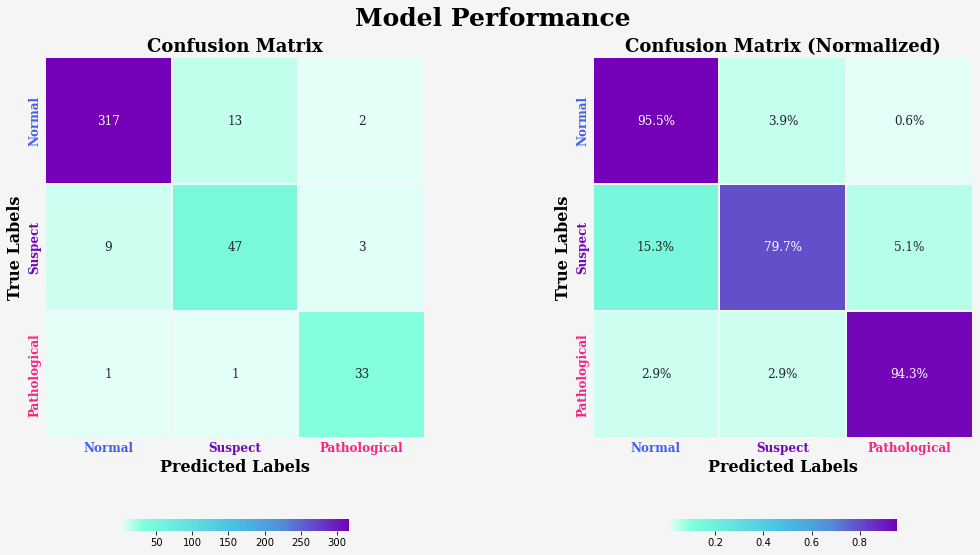

In [ ]:
colormap = mpl.colors.LinearSegmentedColormap.from_list("", COLORS["cmap_color_list"][::-1])

plot_confusion_matrix(y_test, y_pred, figsize=(18,10), cmap=colormap, suptitle="Model Performance")

Model terakhir bekerja cukup baik dalam hal memprediksi dengan benar <font color="#4361EE"><b>Normal</b></font> dan <font color="#f72585"><b>Patologis</b ></font>, tetapi lebih sulit membedakan antara <font color="#7209b7"><b>Tersangka</b></font> dan <font color="#4361EE"><b>Normal</ b></font> sampel.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_dict.values())

In [ ]:
print(report)
print(f"     roc auc       {np.round(test_roc_auc, 2)}")

              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96       332
     Suspect       0.77      0.80      0.78        59
Pathological       0.87      0.94      0.90        35

    accuracy                           0.93       426
   macro avg       0.87      0.90      0.88       426
weighted avg       0.93      0.93      0.93       426

     roc auc       0.98


In [ ]:
y_prob_max = np.max(y_prob, axis=1)

prob_thresh_low_conf = 0.6
prob_thresh_high_conf = 0.7

ind_low_conf = y_prob_max < prob_thresh_low_conf
ind_high_conf = y_prob_max > prob_thresh_high_conf

y_test_low_conf = y_test.iloc[ind_low_conf].rename("y_test").astype(int)
y_pred_low_conf = pd.Series(y_pred[ind_low_conf], index=y_test_low_conf.index, name="y_pred")

y_test_high_conf = y_test.iloc[ind_high_conf].rename("y_test").astype(int)
y_pred_high_conf = pd.Series(y_pred[ind_high_conf], index=y_test_high_conf.index, name="y_pred")

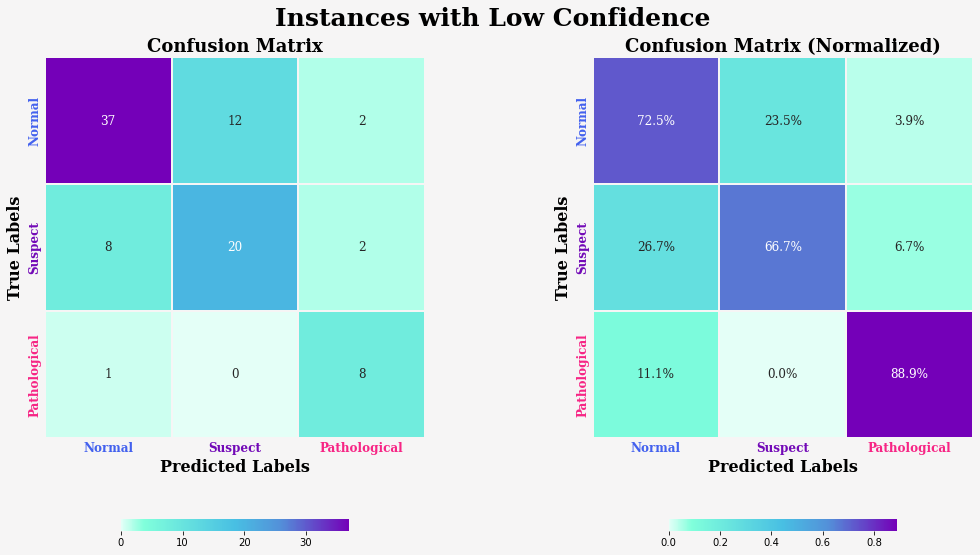

In [ ]:
plot_confusion_matrix(y_test_low_conf, y_pred_low_conf, figsize=(18,10), cmap=colormap, suptitle="Instances with Low Confidence")

Dengan memeriksa contoh dalam set pengujian yang probabilitas prediksi modelnya relatif rendah (dipilih secara sewenang-wenang sebagai $<0,6$ di sini), kita dapat melihat bahwa dalam sampel ini, yang modelnya <b><i>paling tidak pasti< /i></b>, sebagian besar kesalahan adalah untuk membedakan antara <font color="#7209b7"><b>Tersangka</b></font> dan <font color="#4361EE"><b> Sampel</b></font> normal.

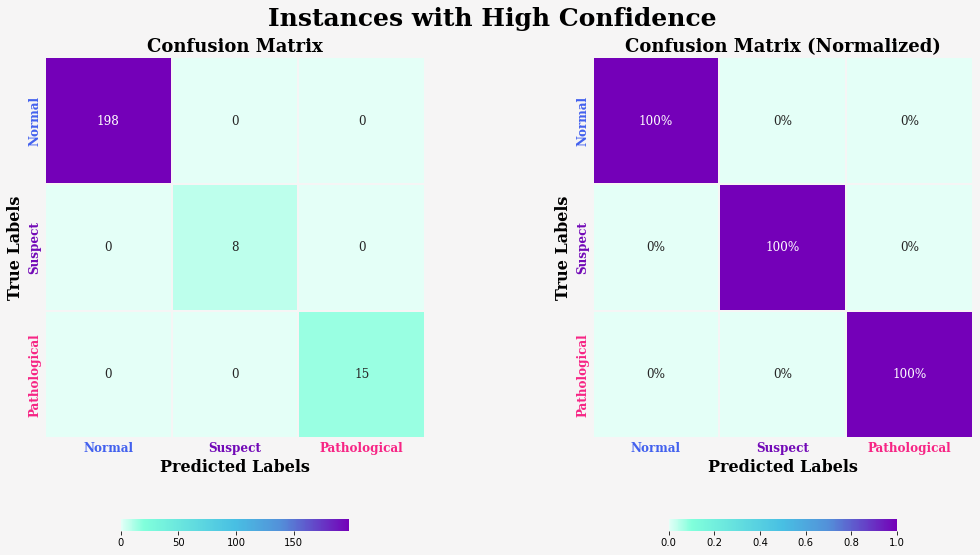

In [ ]:
plot_confusion_matrix(y_test_high_conf, y_pred_high_conf, figsize=(18,10), cmap=colormap, suptitle="Instances with High Confidence")

Saat memeriksa sampel yang modelnya <b><i>paling pasti</i></b> (dengan probabilitas prediksi dipilih secara acak sebagai $>0.7$ di sini), model memang mengklasifikasikan semua sampel tersebut dengan benar.

# Resources
1. [Grivell RM, Alfirevic Z, Gyte GML, Devane D. Antenatal cardiotocography for fetal assessment. Cochrane Database of Systematic Reviews 2015, Issue 9. Art. No.: CD007863. DOI: 10.1002/14651858.CD007863.pub4. Accessed 31 January 2023.](https://www.cochranelibrary.com/cdsr/doi/10.1002/14651858.CD007863.pub4/full)
2. [Prajapati AK, Kumar V, Soni K, Singh NP, Jain PK, Ruchi. Prevalence of high-risk pregnancy among pregnant women enrolled under Pradhan Mantri Surakshit Matritva Abhiyan in government health facilities of district Etawah, Uttar Pradesh: A cross-sectional study. J Family Med Prim Care. 2022 May;11(5):1876-1882. doi: 10.4103/jfmpc.jfmpc_1636_21. Epub 2022 May 14. PMID: 35800511; PMCID: PMC9254766.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9254766/#:~:text=Early%20and%20regular%20antenatal%20checkups,of%20perinatal%20morbidity%20and%20mortality.)
3. [Cardiotocography on wikipedia]()